In [1]:
import json
import os
import numpy as np
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
from docx import Document
from docx.shared import Pt
import pickle
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from IPython.display import display

import math
import statistics
from scipy.stats import norm

from IPython.display import display


from matplotlib.pyplot import figure

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
def save_dataframe(file_name, dataframe_to_save):
    
    try:
        dataframe_to_save.to_csv(path_dataset+file_name+".csv", index = False, sep = "\t")
        print("File salvato correttamente")
        
    except:
        print("Errore nel salvataggio")
    
    return

In [3]:
risorsa = 'ParlaMint'

In [4]:
path_dataset = "../dataset/"

In [5]:
path_risorse = "../dataset/cosine_distances/"

In [6]:
path_images = "../plots/"
path_images_tit_ridotti = "../plots_titoli_ridotti/"

In [7]:
df_dist_5_cosine_distance_no_pretrain = pd.read_csv("{}df_dist_5_cosine_distance_no_pretrain.csv".format(path_risorse), sep="\t")
df_dist_10_cosine_distance_no_pretrain = pd.read_csv("{}df_dist_10_cosine_distance_no_pretrain.csv".format(path_risorse), sep="\t")
df_dist_20_cosine_distance_no_pretrain = pd.read_csv("{}df_dist_20_cosine_distance_no_pretrain.csv".format(path_risorse), sep="\t")
df_dist_30_cosine_distance_no_pretrain = pd.read_csv("{}df_dist_30_cosine_distance_no_pretrain.csv".format(path_risorse), sep="\t")
df_random_speech_cosine_distance_no_pretrain = pd.read_csv("{}df_random_speech_cosine_distance_no_pretrain.csv".format(path_risorse), sep="\t")

In [8]:
df_dist_5_cosine_distance_no_pretrain

Id                                         Sentence_1  \
0       3511            È questo «in nome del popolo italiano»?   
1     443194  Non guardiamo a soluzioni come l'erezione di m...   
2     438394  La popolazione carceraria è scesa a 52.164 e s...   
3     313751  Mi fermo perché non voglio offendere nessuno, ...   
4     488165  La prima riunione europea dei Ministri della s...   
...      ...                                                ...   
2395   35231  Non è un caso che il Governo e la maggioranza ...   
2396  300044  Anzi, svolse sempre con passione e consapevole...   
2397   74207  È chiaro che una catastrofe delle dimensioni d...   
2398  390608  Se doveva cadere così in basso, era più dignit...   
2399  187838  Non ci sono parole per ringraziare i nostri me...   

                                             Sentence_2  Class  \
0     Signor Presidente, ho chiesto di intervenire a...      1   
1     Tutto ciò deve necessariamente avvenire attrav...      1   
2     Sei anni fa i detenuti erano 67.971 e 21.494 l...      0   
3                                     Ci ridono dietro!      1   
4     Siamo un grande Paese, che ha svolto un lavoro...      1   
...                                                 ...    ...   
2395  Ma neanche il testo di mediazione che la Commi...      0   
2396  Con lui scompare una figura importante della s...      0   
2397  Cito, prima di invitare l'Assemblea all'approv...      1   
2398  Un'Assemblea tanto grande quanto debole, i cui...      1   
2399  Penso allo sconforto di chi ha perso un genito...      1   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0028                   0.0058   
1                      0.0005                   0.0012   
2                      0.0009                   0.0021   
3                      0.0047                   0.0086   
4                      0.0009                   0.0018   
...                       ...                      ...   
2395                   0.0013                   0.0029   
2396                   0.0009                   0.0018   
2397                   0.0015                   0.0030   
2398                   0.0016                   0.0034   
2399                   0.0011                   0.0023   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0080                   0.0113   
1                      0.0019                   0.0025   
2                      0.0034                   0.0046   
3                      0.0127                   0.0178   
4                      0.0028                   0.0037   
...                       ...                      ...   
2395                   0.0045                   0.0058   
2396                   0.0028                   0.0038   
2397                   0.0046                   0.0058   
2398                   0.0047                   0.0061   
2399                   0.0039                   0.0057   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0132                   0.0146   
1                      0.0031                   0.0038   
2                      0.0054                   0.0064   
3                      0.0197                   0.0235   
4                      0.0044                   0.0051   
...                       ...                      ...   
2395                   0.0071                   0.0082   
2396                   0.0052                   0.0063   
2397                   0.0071                   0.0089   
2398                   0.0074                   0.0088   
2399                   0.0069                   0.0085   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0176                   0.0214   
1                      0.0046                   0.0053   
2                      0.0079                   0.0088   
3                      0.0285                   0.0333   
4                      0.0061  

In [9]:
df_dist_10_cosine_distance_no_pretrain

Id                                         Sentence_1  \
0      14266  Ha preso visione di carte, ha fatto i controll...   
1     579957  C'è stata la volontà di sforzarsi di fare sint...   
2      46520  Indìco la votazione nominale con scrutinio sim...   
3      58326  Sono felice e contenta - e lo dico per soddisf...   
4     509841  Purtroppo il controllo oggi è affidato soltant...   
...      ...                                                ...   
2395  716012  In questa richiesta c'è la testimonianza della...   
2396   82687  Signor Presidente, più di un anno fa ho deposi...   
2397  190832  Oggi lei conferma questa impostazione e la arr...   
2398  435685  Lasciate che mostrino tutte le loro divisioni ...   
2399   64616  Il modello semipresidenziale presenterebbe ino...   

                                             Sentence_2  Class  \
0     Con questo disegno di legge noi vogliamo migli...      1   
1     È troppo facile fare promesse elettorali che n...      1   
2                                Il Senato non approva.      0   
3     Non stiamo discutendo, come qualcuno ci diceva...      0   
4     Vorrei richiamare l'attenzione anche su una se...      0   
...                                                 ...    ...   
2395  I provvedimenti in generale da parte della pub...      1   
2396  In terzo luogo, presentano diversi trucchi per...      1   
2397  Due temi più di ogni altro sono chiari nella l...      0   
2398  Prendo atto a malincuore che - pare - i princi...      1   
2399  Per quanto concerne i limiti derivanti dalla m...      0   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0012                   0.0024   
1                      0.0008                   0.0018   
2                      0.0039                   0.0082   
3                      0.0008                   0.0016   
4                      0.0010                   0.0021   
...                       ...                      ...   
2395                   0.0027                   0.0059   
2396                   0.0008                   0.0015   
2397                   0.0016                   0.0031   
2398                   0.0011                   0.0022   
2399                   0.0007                   0.0014   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0039                   0.0049   
1                      0.0031                   0.0042   
2                      0.0118                   0.0159   
3                      0.0026                   0.0037   
4                      0.0034                   0.0044   
...                       ...                      ...   
2395                   0.0089                   0.0115   
2396                   0.0024                   0.0031   
2397                   0.0047                   0.0067   
2398                   0.0034                   0.0046   
2399                   0.0025                   0.0033   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0063                   0.0078   
1                      0.0053                   0.0067   
2                      0.0191                   0.0224   
3                      0.0045                   0.0055   
4                      0.0052                   0.0065   
...                       ...                      ...   
2395                   0.0145                   0.0183   
2396                   0.0037                   0.0043   
2397                   0.0083                   0.0103   
2398                   0.0057                   0.0072   
2399                   0.0041                   0.0052   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0093                   0.0104   
1                      0.0078                   0.0088   
2                      0.0281                   0.0338   
3                      0.0065                   0.0079   
4                      0.0073  

In [10]:
df_dist_20_cosine_distance_no_pretrain

Id                                         Sentence_1  \
0     872979  Forse il cambiamento si limitava al portare gl...   
1     196247  Un fatto che ha destato in noi grande inquietu...   
2     519084  In buona sostanza riproduce le stesse fattispe...   
3     651123  Si tratta di un ghetto che, nonostante l'impeg...   
4     824922  Ma, come sappiamo, la questione può essere sup...   
...      ...                                                ...   
2395  523401  In questi mesi, quante visite mediche sono sal...   
2396   17750  Il decreto - legge in esame, che dà un'altra f...   
2397  288870  I Paesi esteri mandano i loro capitali qui e f...   
2398  451578  Indìco la votazione nominale con scrutinio sim...   
2399  773832                             Il Senato non approva.   

                                             Sentence_2  Class  \
0     Anzi, proprio lei ha chiesto a noi di cambiare...      0   
1     Un evento che noi del Gruppo parlamentare Movi...      0   
2     È invece punito con la pena della reclusione d...      1   
3     Sono emendamenti assolutamente puntuali che ch...      1   
4     In questa disciplina si distinguono i Paesi te...      0   
...                                                 ...    ...   
2395  Se c'è un Ministro dell'interno, che si faccia...      1   
2396  La raccolta differenziata in Campania è al min...      1   
2397                       I problemi vanno affrontati!      1   
2398                             Il Senato non approva.      0   
2399  Risultano pertanto preclusi la restante parte ...      0   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0019                   0.0035   
1                      0.0010                   0.0019   
2                      0.0003                   0.0007   
3                      0.0012                   0.0025   
4                      0.0015                   0.0029   
...                       ...                      ...   
2395                   0.0025                   0.0052   
2396                   0.0016                   0.0033   
2397                   0.0047                   0.0091   
2398                   0.0040                   0.0080   
2399                   0.0047                   0.0084   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0054                   0.0072   
1                      0.0030                   0.0041   
2                      0.0010                   0.0013   
3                      0.0041                   0.0056   
4                      0.0043                   0.0060   
...                       ...                      ...   
2395                   0.0085                   0.0121   
2396                   0.0045                   0.0063   
2397                   0.0141                   0.0185   
2398                   0.0125                   0.0171   
2399                   0.0133                   0.0178   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0090                   0.0108   
1                      0.0050                   0.0066   
2                      0.0017                   0.0022   
3                      0.0067                   0.0081   
4                      0.0073                   0.0088   
...                       ...                      ...   
2395                   0.0140                   0.0160   
2396                   0.0083                   0.0105   
2397                   0.0230                   0.0286   
2398                   0.0227                   0.0265   
2399                   0.0231                   0.0260   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0136                   0.0144   
1                      0.0083                   0.0091   
2                      0.0027                   0.0032   
3                      0.0100                   0.0114   
4                      0.0102  

In [11]:
df_dist_30_cosine_distance_no_pretrain

Id                                         Sentence_1  \
0     752594  Signor Presidente, voglio iniziare ricordando ...   
1     147441  Adesso il Governo si è impegnato molto su ques...   
2     118812  Credo sia quindi indispensabile che si diffond...   
3     396655  Signora Presidente, il tema della lotta alle m...   
4     192358  Ecco, siamo diventati cittadini che camminano ...   
...      ...                                                ...   
2395  419047  Solo una minima parte di coloro che, anche in ...   
2396  425997  A tal fine, è stato costituito un sistema di c...   
2397  579555                             Il Senato non approva.   
2398  398376  Indìco la votazione nominale con scrutinio sim...   
2399  106289  Voi avete posto la fiducia - ve lo vorrei rico...   

                                             Sentence_2  Class  \
0     Il primo è che quella elettorale è una legge f...      0   
1     La scuola ha affrontato tre mesi difficilissim...      1   
2     L'articolo 7 dispone invece la soppressione di...      1   
3     È proprio questo il senso delle relazioni che ...      0   
4     Dovremo iniziare a guardarci dal di fuori, dov...      0   
...                                                 ...    ...   
2395  Nei giorni scorsi abbiamo fatto una figuraccia...      0   
2396  Vorrei ancora ricordare il disegno di legge ap...      0   
2397  L'emendamento 2.1320 è precluso dalla reiezion...      0   
2398  Passiamo alla votazione della prima parte dell...      1   
2399                     Ma è questa la questione vera.      1   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0009                   0.0019   
1                      0.0020                   0.0038   
2                      0.0019                   0.0036   
3                      0.0013                   0.0029   
4                      0.0015                   0.0028   
...                       ...                      ...   
2395                   0.0008                   0.0015   
2396                   0.0009                   0.0021   
2397                   0.0036                   0.0086   
2398                   0.0006                   0.0012   
2399                   0.0031                   0.0064   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0027                   0.0033   
1                      0.0058                   0.0081   
2                      0.0057                   0.0073   
3                      0.0043                   0.0058   
4                      0.0046                   0.0056   
...                       ...                      ...   
2395                   0.0025                   0.0035   
2396                   0.0034                   0.0047   
2397                   0.0125                   0.0162   
2398                   0.0021                   0.0024   
2399                   0.0097                   0.0120   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0042                   0.0048   
1                      0.0101                   0.0122   
2                      0.0090                   0.0108   
3                      0.0072                   0.0087   
4                      0.0067                   0.0084   
...                       ...                      ...   
2395                   0.0045                   0.0057   
2396                   0.0057                   0.0070   
2397                   0.0197                   0.0243   
2398                   0.0028                   0.0036   
2399                   0.0150                   0.0175   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0057                   0.0066   
1                      0.0155                   0.0171   
2                      0.0130                   0.0153   
3                      0.0109                   0.0118   
4                      0.0096  

In [12]:
list_of_df_no_pretrain = [df_dist_5_cosine_distance_no_pretrain, df_dist_10_cosine_distance_no_pretrain, \
              df_dist_20_cosine_distance_no_pretrain, df_dist_30_cosine_distance_no_pretrain, \
              df_random_speech_cosine_distance_no_pretrain]
list_of_names_no_pretrain = ['df_dist_5', 'df_dist_10', 'df_dist_20', 'df_dist_30', 'df_random_speech']

In [27]:
def get_summary_of_cosine_distances(list_of_df, list_of_names):
    
    df_summary = {}
    
    for df, df_name in zip(list_of_df, list_of_names):
        
        df_summary[df_name] = {}
        
        #dataset delle frasi non consecutive
        df_frasi_non_consecutive = df[df['Class'] == 1]
        
        #dataset delle frasi consecutive
        df_frasi_consecutive = df[df['Class'] == 0]
        
        #colonne dei layers
        layer_columns = [col for col in df.columns if 'Cosine_distance' in col]
        
        for layer_col in layer_columns:
            
            df_summary[df_name][layer_col] = {}
            
            df_summary[df_name][layer_col]['1'] = {
                'Mean': float("%.4f"%(np.mean(df_frasi_non_consecutive[layer_col].values))),
                'Standard Deviation': float("%.4f"%(np.std(df_frasi_non_consecutive[layer_col].values)))
                
            }
            df_summary[df_name][layer_col]['0'] = {
                'Mean': float("%.4f"%(np.mean(df_frasi_consecutive[layer_col].values))),
                'Standard Deviation': float("%.4f"%(np.std(df_frasi_consecutive[layer_col].values)))
                
            }
    
    return df_summary

In [28]:
df_cosine_distances_dict_no_pretrain = get_summary_of_cosine_distances(list_of_df_no_pretrain, list_of_names_no_pretrain)

In [29]:
df_cosine_distances_dict_no_pretrain

{'df_dist_5': {'Cosine_distance_layer_1': {'1': {'Mean': 0.0016,
    'Standard Deviation': 0.0011},
   '0': {'Mean': 0.0016, 'Standard Deviation': 0.0011}},
  'Cosine_distance_layer_2': {'1': {'Mean': 0.0032,
    'Standard Deviation': 0.0022},
   '0': {'Mean': 0.0031, 'Standard Deviation': 0.0022}},
  'Cosine_distance_layer_3': {'1': {'Mean': 0.0049,
    'Standard Deviation': 0.0033},
   '0': {'Mean': 0.0048, 'Standard Deviation': 0.0033}},
  'Cosine_distance_layer_4': {'1': {'Mean': 0.0065,
    'Standard Deviation': 0.0043},
   '0': {'Mean': 0.0064, 'Standard Deviation': 0.0042}},
  'Cosine_distance_layer_5': {'1': {'Mean': 0.008,
    'Standard Deviation': 0.0051},
   '0': {'Mean': 0.0078, 'Standard Deviation': 0.005}},
  'Cosine_distance_layer_6': {'1': {'Mean': 0.0095,
    'Standard Deviation': 0.0061},
   '0': {'Mean': 0.0093, 'Standard Deviation': 0.006}},
  'Cosine_distance_layer_7': {'1': {'Mean': 0.0117,
    'Standard Deviation': 0.0074},
   '0': {'Mean': 0.0114, 'Standard Devi

In [16]:
list_of_dataframes = []

for df, l in df_cosine_distances_dict_no_pretrain.items():
    
    lista_valori = []
    lista_colonne = []
    
    for layer, classe in l.items():
        for cl, valore in classe.items():
            #cl_tradotta = "Non segue" if cl == '1' else "Segue"
            for m, v in valore.items():
                l = layer.replace('Cosine_distance', 'C_dist')
                lista_colonne.append((l, cl, m))
                lista_valori.append(v)
        
    df_temp = pd.DataFrame([lista_valori], columns = lista_colonne, index = [df])
    df_temp.columns = pd.MultiIndex.from_tuples(df_temp.columns)
    
    list_of_dataframes.append(df_temp)
    
result = pd.concat(list_of_dataframes).T

headers = {'selector':'th', 'props': [('text-align', 'center'), ('border', '1px solid black')]}
rows = {'selector': 'td', 'props': 'border: 1px solid black'}

save_dataframe('{}_mean_cosine_dist_no_pretrain'.format(risorsa), result)

#result.style.set_table_styles([headers, rows], overwrite=False).format(precision=4)

File salvato correttamente


In [17]:
result

df_dist_5  df_dist_10  df_dist_20  \
C_dist_layer_1  1 Mean                   0.0016      0.0016      0.0017   
                  Standard Deviation     0.0011      0.0010      0.0011   
                0 Mean                   0.0016      0.0016      0.0017   
                  Standard Deviation     0.0011      0.0010      0.0011   
C_dist_layer_2  1 Mean                   0.0032      0.0032      0.0033   
                  Standard Deviation     0.0022      0.0021      0.0022   
                0 Mean                   0.0031      0.0032      0.0032   
                  Standard Deviation     0.0022      0.0021      0.0022   
C_dist_layer_3  1 Mean                   0.0049      0.0050      0.0050   
                  Standard Deviation     0.0033      0.0031      0.0034   
                0 Mean                   0.0048      0.0049      0.0050   
                  Standard Deviation     0.0033      0.0032      0.0034   
C_dist_layer_4  1 Mean                   0.0065      0.0066      0.0069   
                  Standard Deviation     0.0043      0.0041      0.0046   
                0 Mean                   0.0064      0.0064      0.0068   
                  Standard Deviation     0.0042      0.0043      0.0047   
C_dist_layer_5  1 Mean                   0.0080      0.0083      0.0087   
                  Standard Deviation     0.0051      0.0052      0.0059   
                0 Mean                   0.0078      0.0080      0.0087   
                  Standard Deviation     0.0050      0.0053      0.0061   
C_dist_layer_6  1 Mean                   0.0095      0.0102      0.0106   
                  Standard Deviation     0.0061      0.0063      0.0070   
                0 Mean                   0.0093      0.0099      0.0106   
                  Standard Deviation     0.0060      0.0064      0.0071   
C_dist_layer_7  1 Mean                   0.0117      0.0119      0.0130   
                  Standard Deviation     0.0074      0.0075      0.0085   
                0 Mean                   0.0114      0.0116      0.0130   
                  Standard Deviation     0.0072      0.0077      0.0085   
C_dist_layer_8  1 Mean                   0.0133      0.0138      0.0147   
                  Standard Deviation     0.0086      0.0086      0.0098   
                0 Mean                   0.0130      0.0134      0.0148   
                  Standard Deviation     0.0084      0.0089      0.0099   
C_dist_layer_9  1 Mean                   0.0154      0.0164      0.0157   
                  Standard Deviation     0.0099      0.0102      0.0102   
                0 Mean                   0.0150      0.0160      0.0157   
                  Standard Deviation     0.0097      0.0105      0.0103   
C_dist_layer_10 1 Mean                   0.0175      0.0176      0.0185   
                  Standard Deviation     0.0114      0.0108      0.0117   
                0 Mean                   0.0170      0.0171      0.0184   
                  Standard Deviation     0.0112      0.0111      0.0118   
C_dist_layer_11 1 Mean                   0.0190      0.0200      0.0211   
                  Standard Deviation     0.0124      0.0124      0.0136   
                0 Mean                   0.0185      0.0194      0.0210   
                  Standard Deviation     0.0121      0.0126      0.0136   
C_dist_layer_12 1 Mean                   0.0205      0.0211      0.0232   
                  Standard Deviation     0.0136      0.0129      0.0150   
                0 Mean                   0.0199      0.0205      0.0231   
                  Standard Deviation     0.0133      0.0132      0.0151   

                                      df_dist_30  df_random_speech  
C_dist_layer_1  1 Mean                    0.0017            0.0019  
                  Standard Deviation      0.0012            0.0011  
                0 Mean                    0.0016            0.0017  
                  Standard Deviation      0.0011            0.0011  
C_dist_layer_2  1

In [18]:
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

def plot_classes_cosine_distance_progress_across_layers(df_cosine_distances_dict, titolo_ridotto=''):
    
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,5), sharey=True)
    
    for n, distance in enumerate(df_cosine_distances_dict):
        
        #layers
        layers = [layer for layer in df_cosine_distances_dict[distance]]
        
        #medie delle distanze coseniche per le classi
        mean_values_1 = [df_cosine_distances_dict[distance][layer]['1']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]
        
        mean_values_0 = [df_cosine_distances_dict[distance][layer]['0']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]

        ax[n].plot(layers, mean_values_1, label='1', color= 'r')
        ax[n].plot(layers, mean_values_0, label='0')
        ax[n].legend(title='Class')
        dist = ''.join([i for i in distance if i.isdigit()]) 
        if not dist:
            dist = 'random_speech'
        if not dist:
            dist = 'random_speech'
        title = "{} Cosine distance \nmean's progress across layers \n(distance {})".format(risorsa, ''.join([i for i in distance if i.isdigit()]))
        ax[n].set_title(title)
        if titolo_ridotto:
            title = "Distance {}".format(dist)
        ax[n].set_title(title)
        ax[n].set_xticklabels(layers, rotation=90)
        
        ax[n].yaxis.set_major_locator(MultipleLocator(0.01))
        
        ax[n].yaxis.set_minor_locator(MultipleLocator(0.01))
        
                              
    plt.tight_layout()
    
    tit = "{} Cosine distance mean's progress across layers".format(risorsa)

    if titolo_ridotto:
        fig.savefig(path_images_tit_ridotti + tit + '_no_pretrain.png', dpi=fig.dpi, bbox_inches='tight')
    else:
        fig.savefig(path_images + tit + '_no_pretrain.png', dpi=fig.dpi, bbox_inches='tight')
    
    plt.show()

/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5288/662017323.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5288/662017323.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5288/662017323.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5288/662017323.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5288/662017323.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation

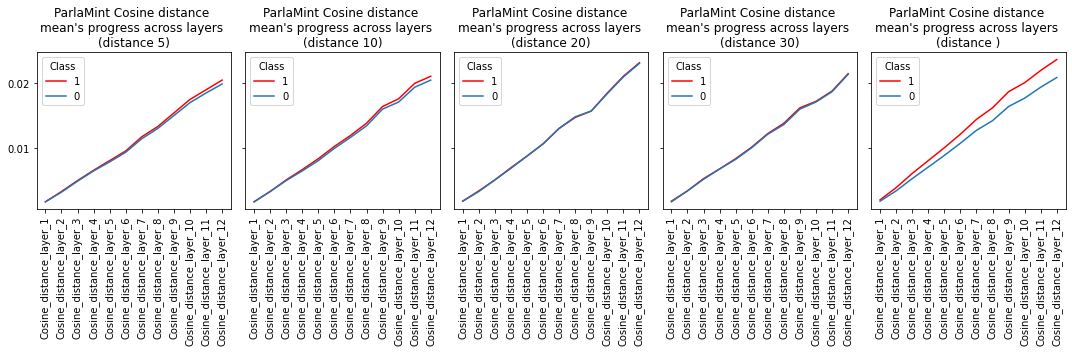

In [19]:
plot_classes_cosine_distance_progress_across_layers(df_cosine_distances_dict_no_pretrain)

/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5288/662017323.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5288/662017323.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5288/662017323.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5288/662017323.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5288/662017323.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation

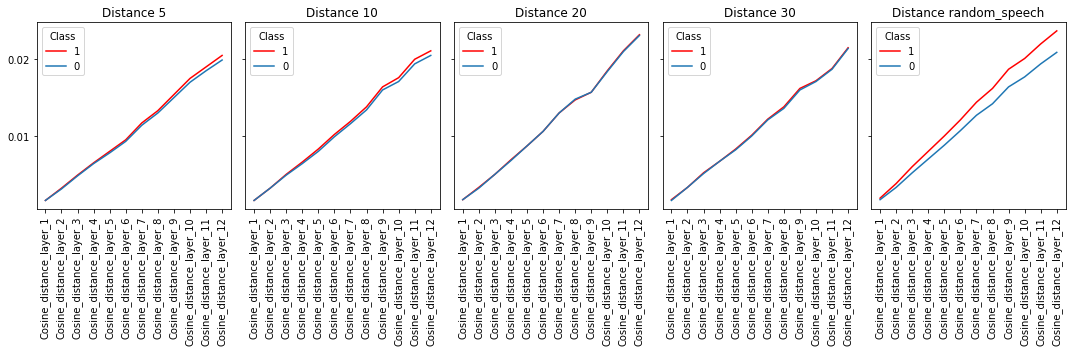

In [20]:
plot_classes_cosine_distance_progress_across_layers(df_cosine_distances_dict_no_pretrain, 'ridotto')

In [21]:
def plot_classes_cosine_distance_progress_across_layers_con_labels_specifiche(df_cosine_distances_dict, titolo_ridotto=''):
    
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,5), sharey=True)
    
    for n, distance in enumerate(df_cosine_distances_dict):
        
        #layers
        layers = [layer for layer in df_cosine_distances_dict[distance]]
        
        #medie delle distanze coseniche per le classi
        mean_values_1 = [df_cosine_distances_dict[distance][layer]['1']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]
        
        mean_values_0 = [df_cosine_distances_dict[distance][layer]['0']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]

        ax[n].plot(layers, mean_values_1, label='Eventi non consecutivi', color= 'r')
        ax[n].plot(layers, mean_values_0, label='Eventi consecutivi')
        ax[n].legend(loc='upper left')
        dist = ''.join([i for i in distance if i.isdigit()]) 
        if not dist:
            dist = 'random_speech'
        if not dist:
            dist = 'random_speech'
        title = "{} Cosine distance \nmean's progress across layers \n(distance {})".format(risorsa, ''.join([i for i in distance if i.isdigit()]))
        ax[n].set_title(title)
        if titolo_ridotto:
            title = "Distance {}".format(dist)
        ax[n].set_title(title)
        ax[n].set_xticklabels(layers, rotation=90)
        
        ax[n].yaxis.set_major_locator(MultipleLocator(0.01))
        
        ax[n].yaxis.set_minor_locator(MultipleLocator(0.01))
        
                              
    plt.tight_layout()
    
    tit = "{} Cosine distance mean's progress across layers".format(risorsa)

    if titolo_ridotto:
        fig.savefig(path_images_tit_ridotti + tit + '_no_pretrain.png', dpi=fig.dpi, bbox_inches='tight')
    else:
        fig.savefig(path_images + tit + '_no_pretrain.png', dpi=fig.dpi, bbox_inches='tight')
    
    plt.show()

/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5288/1558412264.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5288/1558412264.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5288/1558412264.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5288/1558412264.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5288/1558412264.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rot

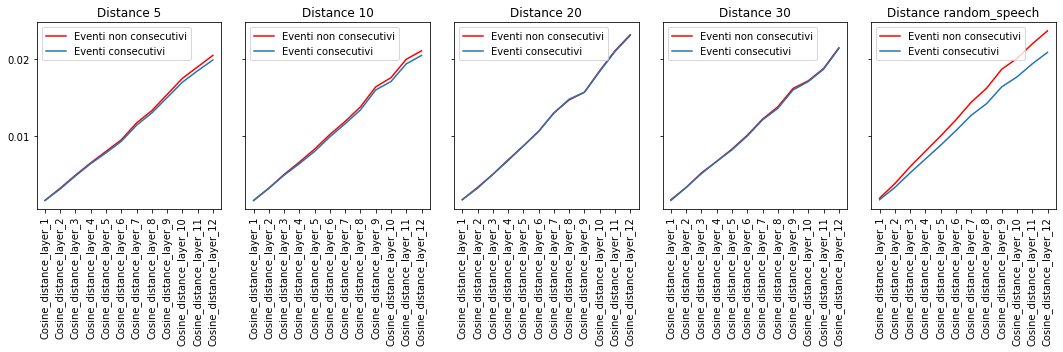

In [22]:
plot_classes_cosine_distance_progress_across_layers_con_labels_specifiche(df_cosine_distances_dict_no_pretrain, 'ridotto')

In [23]:
df_dist_5_cosine_distance_no_pretrain

Id                                         Sentence_1  \
0       3511            È questo «in nome del popolo italiano»?   
1     443194  Non guardiamo a soluzioni come l'erezione di m...   
2     438394  La popolazione carceraria è scesa a 52.164 e s...   
3     313751  Mi fermo perché non voglio offendere nessuno, ...   
4     488165  La prima riunione europea dei Ministri della s...   
...      ...                                                ...   
2395   35231  Non è un caso che il Governo e la maggioranza ...   
2396  300044  Anzi, svolse sempre con passione e consapevole...   
2397   74207  È chiaro che una catastrofe delle dimensioni d...   
2398  390608  Se doveva cadere così in basso, era più dignit...   
2399  187838  Non ci sono parole per ringraziare i nostri me...   

                                             Sentence_2  Class  \
0     Signor Presidente, ho chiesto di intervenire a...      1   
1     Tutto ciò deve necessariamente avvenire attrav...      1   
2     Sei anni fa i detenuti erano 67.971 e 21.494 l...      0   
3                                     Ci ridono dietro!      1   
4     Siamo un grande Paese, che ha svolto un lavoro...      1   
...                                                 ...    ...   
2395  Ma neanche il testo di mediazione che la Commi...      0   
2396  Con lui scompare una figura importante della s...      0   
2397  Cito, prima di invitare l'Assemblea all'approv...      1   
2398  Un'Assemblea tanto grande quanto debole, i cui...      1   
2399  Penso allo sconforto di chi ha perso un genito...      1   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0028                   0.0058   
1                      0.0005                   0.0012   
2                      0.0009                   0.0021   
3                      0.0047                   0.0086   
4                      0.0009                   0.0018   
...                       ...                      ...   
2395                   0.0013                   0.0029   
2396                   0.0009                   0.0018   
2397                   0.0015                   0.0030   
2398                   0.0016                   0.0034   
2399                   0.0011                   0.0023   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0080                   0.0113   
1                      0.0019                   0.0025   
2                      0.0034                   0.0046   
3                      0.0127                   0.0178   
4                      0.0028                   0.0037   
...                       ...                      ...   
2395                   0.0045                   0.0058   
2396                   0.0028                   0.0038   
2397                   0.0046                   0.0058   
2398                   0.0047                   0.0061   
2399                   0.0039                   0.0057   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0132                   0.0146   
1                      0.0031                   0.0038   
2                      0.0054                   0.0064   
3                      0.0197                   0.0235   
4                      0.0044                   0.0051   
...                       ...                      ...   
2395                   0.0071                   0.0082   
2396                   0.0052                   0.0063   
2397                   0.0071                   0.0089   
2398                   0.0074                   0.0088   
2399                   0.0069                   0.0085   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0176                   0.0214   
1                      0.0046                   0.0053   
2                      0.0079                   0.0088   
3                      0.0285                   0.0333   
4                      0.0061  

In [23]:
def plot_mean_and_stdev(df):
    
    for layer in range(1,13):
        
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
        
        for cl in [0, 1]:
            
            sns.distplot(df[df['Class'] == cl]['Cosine_distance_layer_{}'.format(layer)], \
                        bins = 'auto', hist=True, hist_kws={'edgecolor' : 'k', 'color':'c', 'alpha':0.3}, \
                         ax=ax[cl], fit=norm, kde_kws={'lw':2, 'label':'KDE', 'color':'red'}, \
                         fit_kws={'label':'Normal distribution', 'color':'blue'})

            m = statistics.mean(df[df['Class'] == cl]['Cosine_distance_layer_{}'.format(layer)])
            sd = statistics.stdev(df[df['Class'] == cl]['Cosine_distance_layer_{}'.format(layer)])
            print("Mean: %.4f" %m)
            print("StDev: %.4f" %sd)
            ax[cl].axvline(m, color = 'k', linestyle='dashed', label='Mean')
            ax[cl].axvline(m + sd, color='orange', linestyle='dashed', label='Mean ± stdev')
            ax[cl].axvline(m - sd, color='orange', linestyle='dashed')

            handles, labels = ax[cl].get_legend_handles_labels()
            ax[cl].legend(handles, labels, title = "Mean and stdev")
            
            ax[cl].set_title("{} Layer {} mean and standard deviation of class {} ({})".format(risorsa, layer, cl, \
                                                                            "Non segue" if cl == 1 else "Segue"))
            
            ax[cl].set_xlabel("Cosine distances")
            
        
        plt.tight_layout()
        plt.show()

In [24]:
def plot_mean_and_stdev_vecchio(df):
        
    for layer in range(1,13):
        
        ax[0] = sns.displot(df, x=df['Cosine_distance_layer_{}'.format(layer)], \
                    bins = 'auto', kde=True, edgecolor= 'k', color='c', alpha=0.3, \
                   )

        
        m = statistics.mean(df['Cosine_distance_layer_{}'.format(layer)])
        sd = statistics.stdev(df['Cosine_distance_layer_{}'.format(layer)])
        print("Mean: %.4f" %m)
        print("StDev: %.4f" %sd)
        ax[0].axvline(m, color = 'k', linestyle='dashed', label='Mean')
        ax[0].axvline(m + sd, color='orange', linestyle='dashed', label='Mean ± stdev')
        ax[0].axvline(m - sd, color='orange', linestyle='dashed')

        handles, labels = ax[0].get_legend_handles_labels()
        ax[0].legend(handles, labels, title = "Mean and stdev")
        

        ax[0].set_title("{} Layer {} mean and standard deviation of class {} ({})".format(risorsa, layer, cl, \
                                                                        "Non segue" if cl == 1 else "Segue"))

        ax[0].set_xlabel("Cosine distances")
        
        #sns.displot(data=df, x=df['Cosine_distance_layer_1'], kind='kde', hue='Class', ax=ax[1])
            
        
        plt.tight_layout()
        plt.show()

In [25]:
def plot_mean_and_standard_deviation(df, stat, color):
    
    for layer in range(1,13):
        g = sns.displot(df, x=df['Cosine_distance_layer_{}'.format(layer)], \
                    bins = 'auto', kde=True, col='Class', stat=stat, color=color)
        
        diz_c_mean = {'cornflowerblue': 'deeppink',
                     'darkorange': 'darkolivegreen',
                      'purple': 'darkorange',
                      'orangered': 'blue',
                      'forestgreen': 'darkslategrey'
                     }
        def stats(x, **kwargs):
            plt.axvline(statistics.mean(x), c='k', ls='dashed', label='Mean')
            plt.axvline(statistics.mean(x) + statistics.stdev(x), c=diz_c_mean[color], ls='dashed', label='Mean ± stdev')
            plt.axvline(statistics.mean(x) - statistics.stdev(x), c=diz_c_mean[color], ls='dashed')

        g.map(stats,'Cosine_distance_layer_{}'.format(layer))
        plt.legend(bbox_to_anchor=(1.4, 1))
    plt.show()

### Count

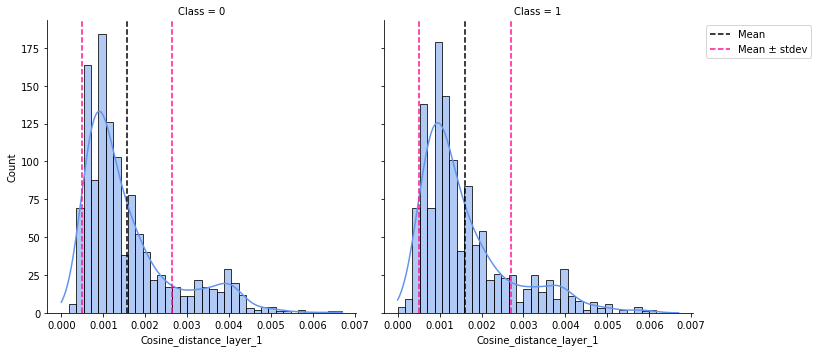

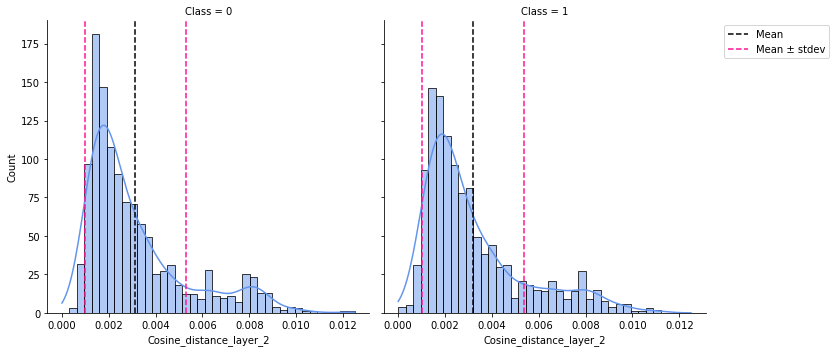

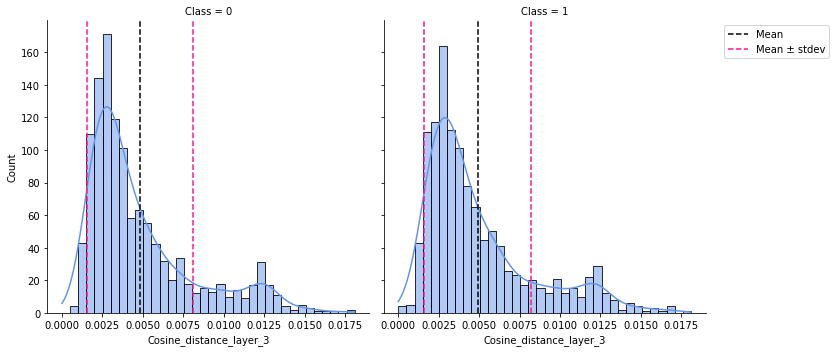

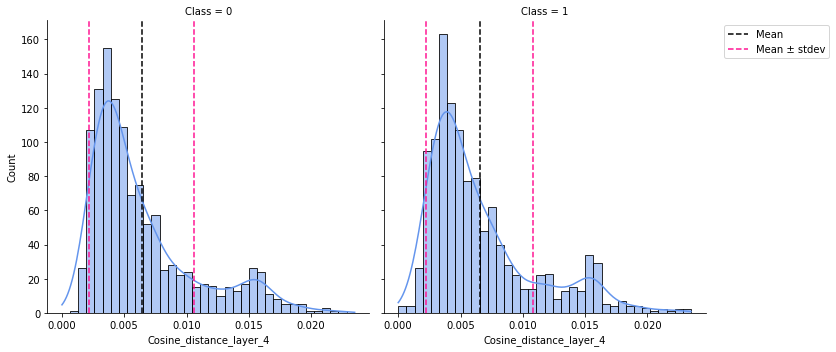

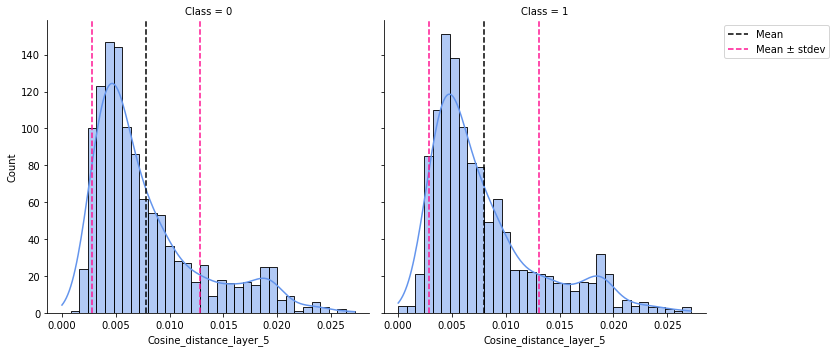

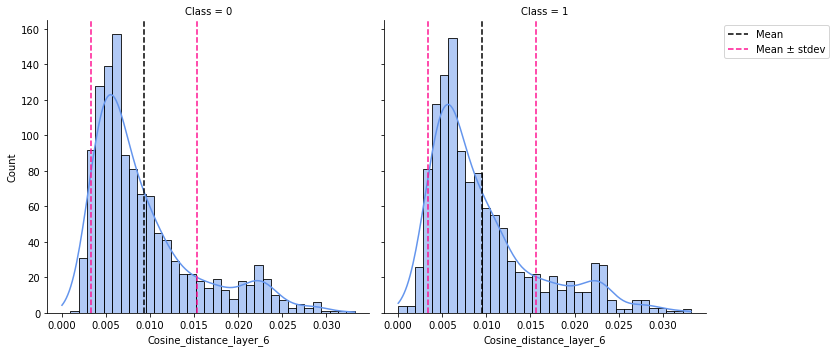

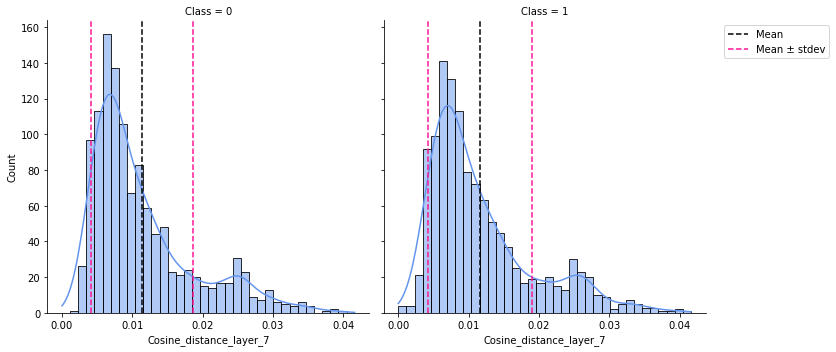

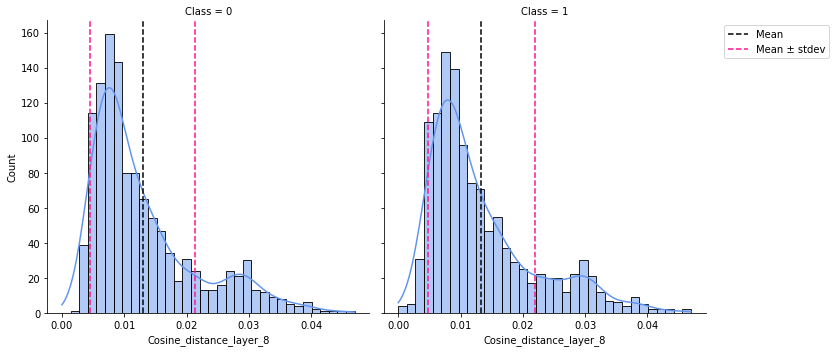

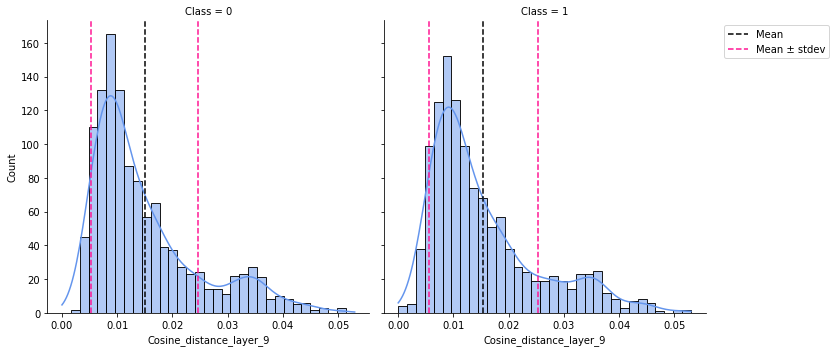

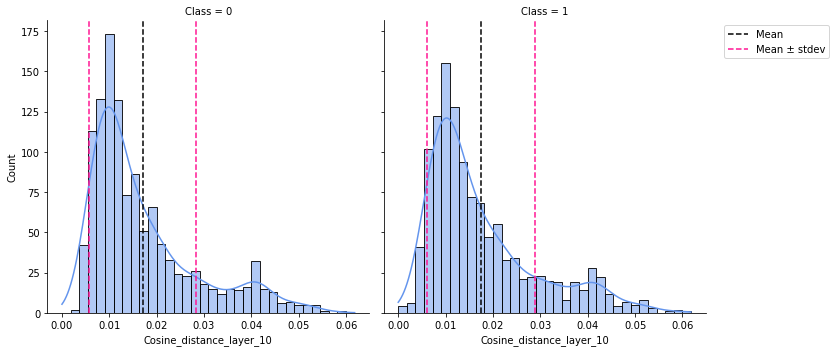

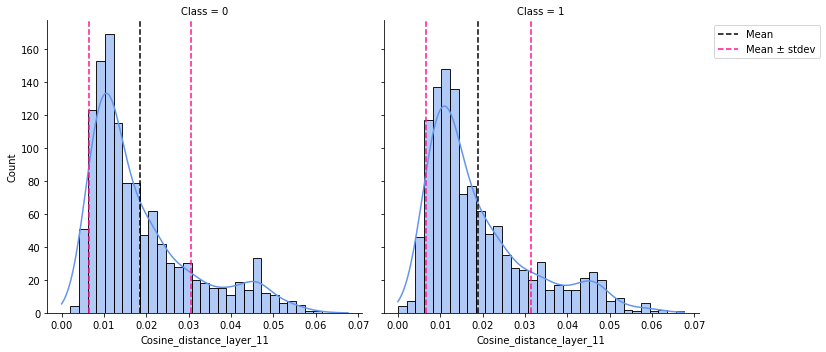

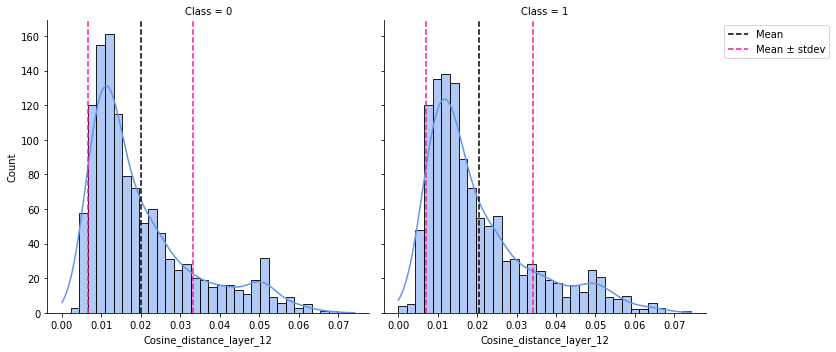

In [26]:
plot_mean_and_standard_deviation(df_dist_5_cosine_distance_no_pretrain, 'count', 'cornflowerblue')

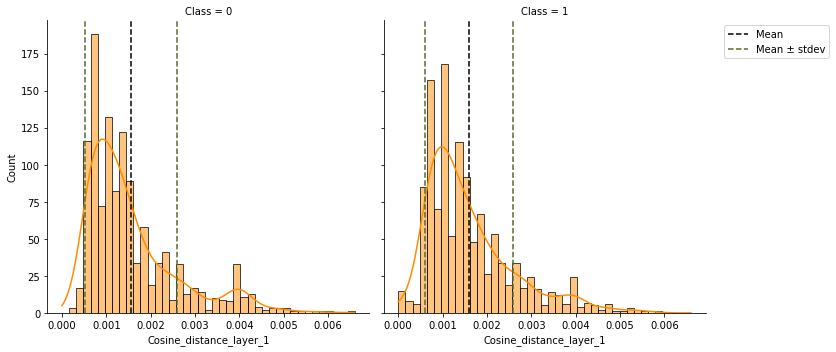

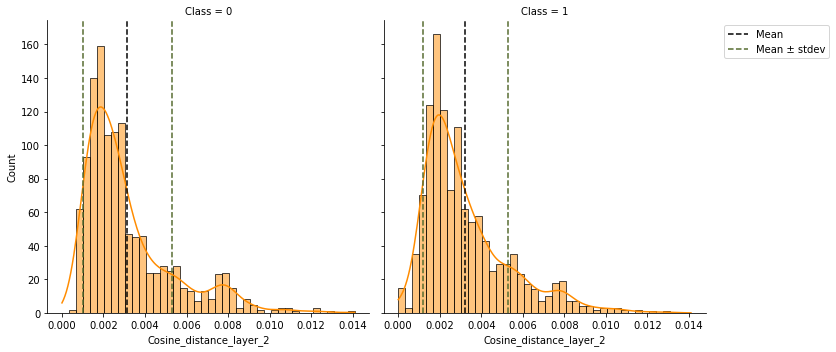

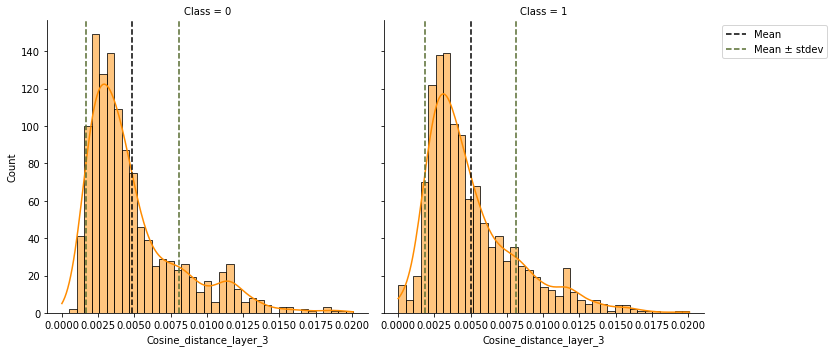

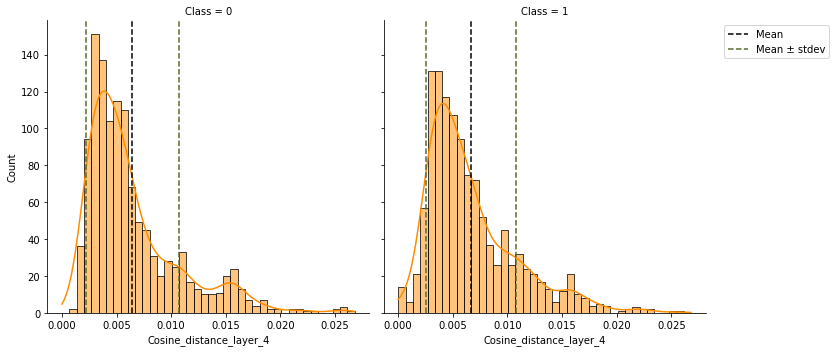

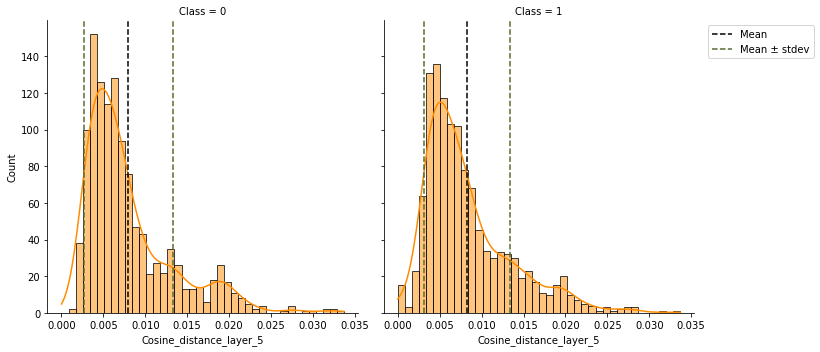

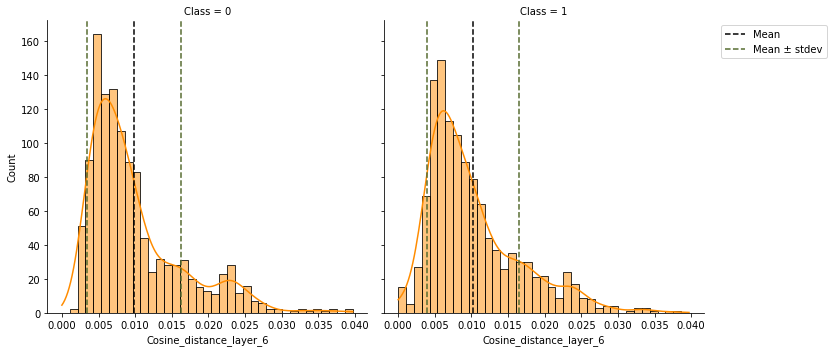

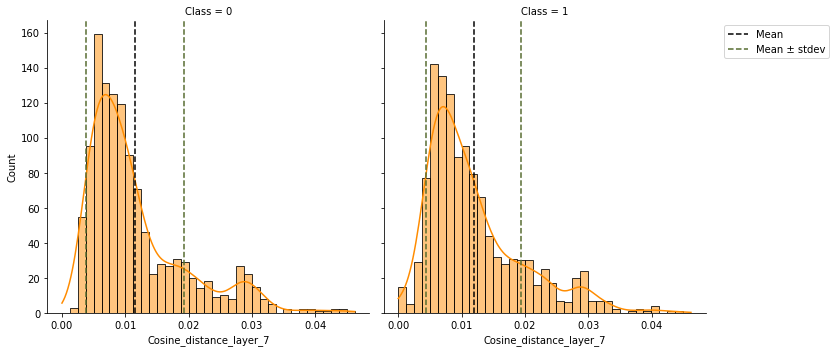

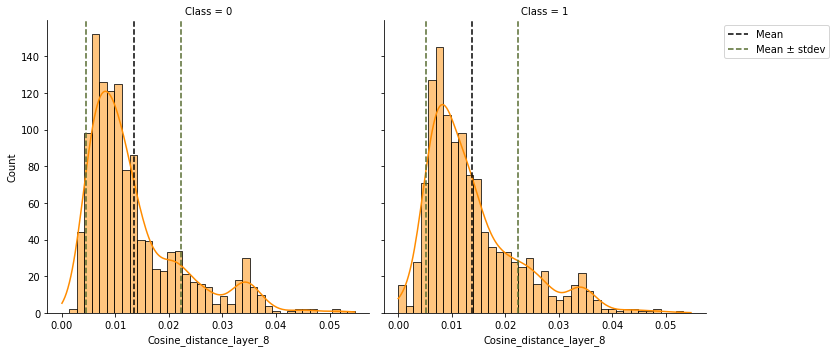

In [27]:
plot_mean_and_standard_deviation(df_dist_10_cosine_distance_no_pretrain, 'count', 'darkorange')

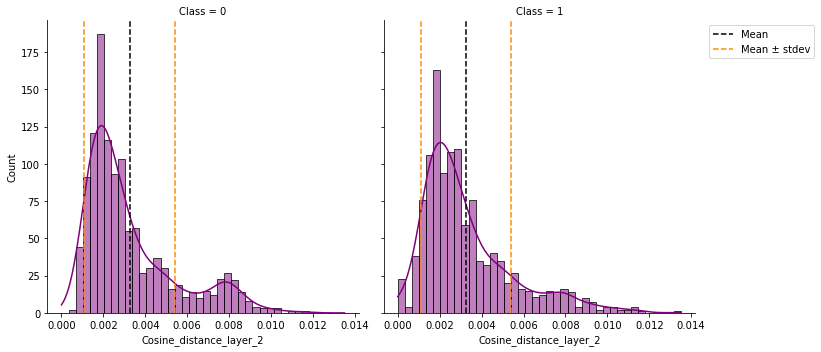

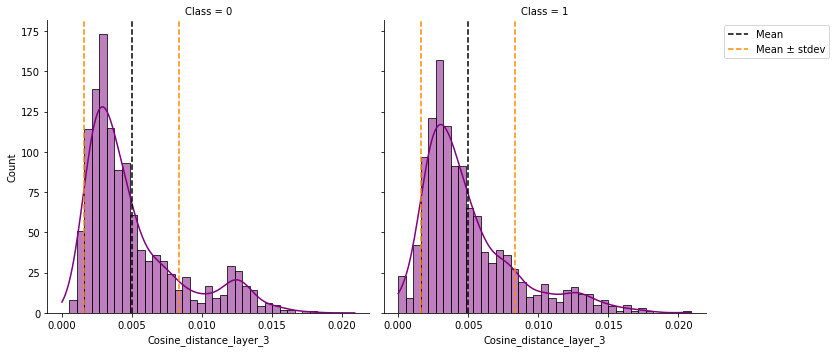

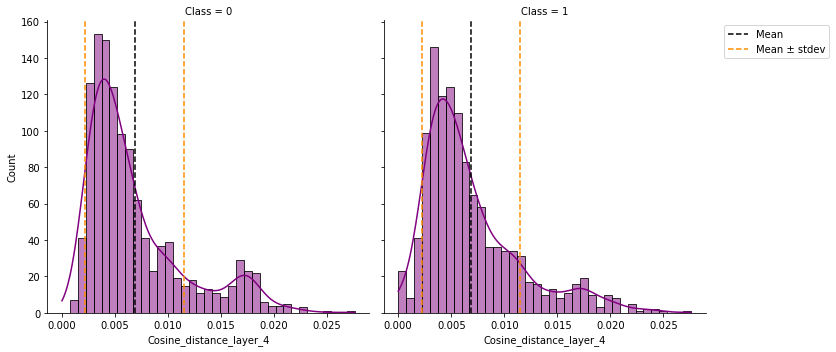

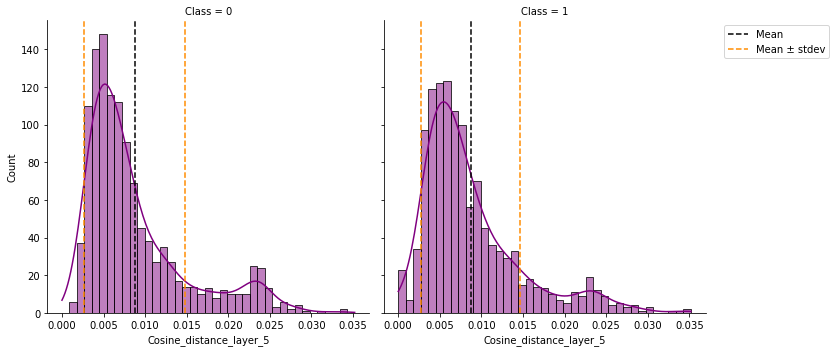

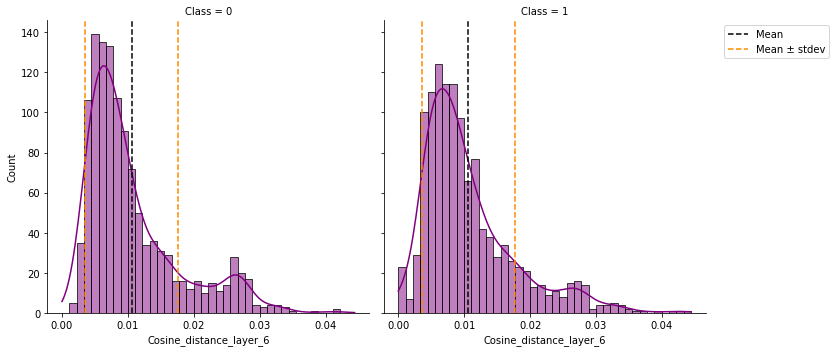

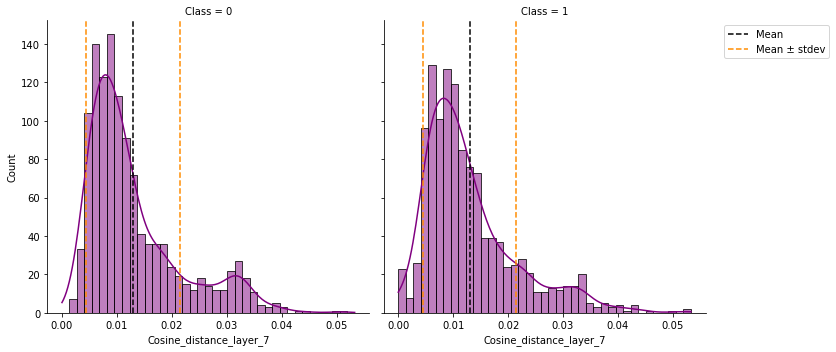

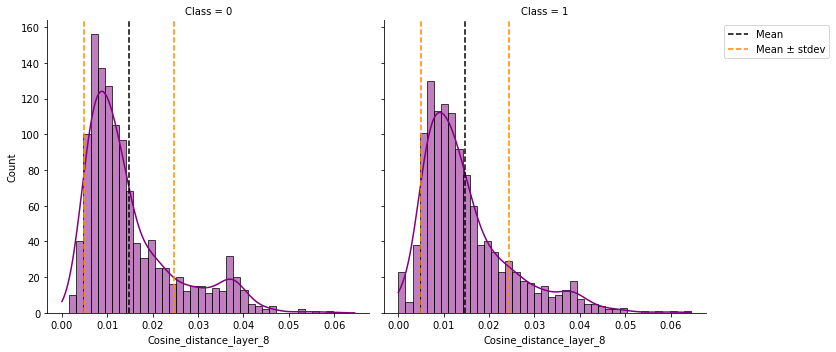

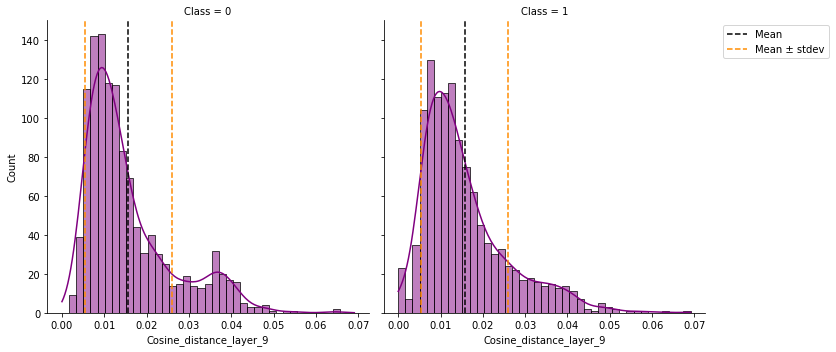

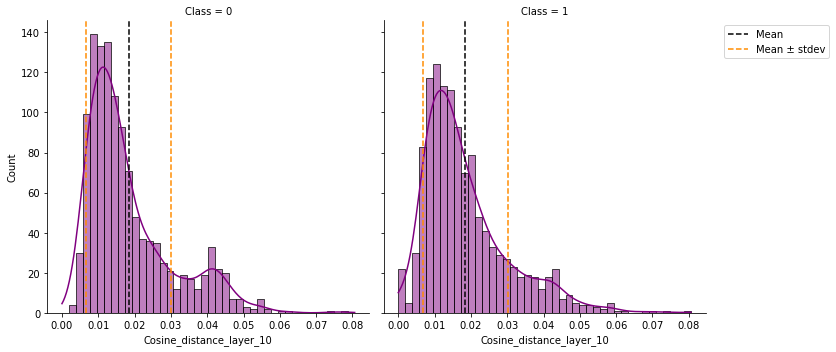

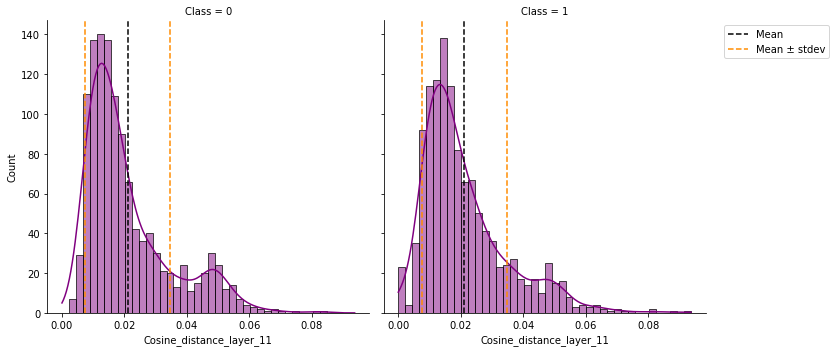

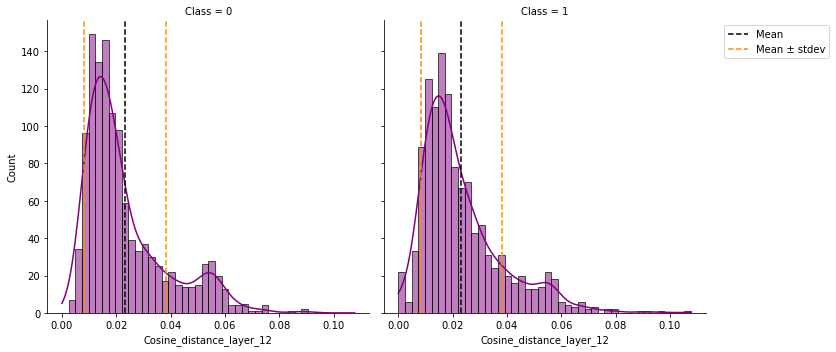

In [28]:
plot_mean_and_standard_deviation(df_dist_20_cosine_distance_no_pretrain, 'count', 'purple')

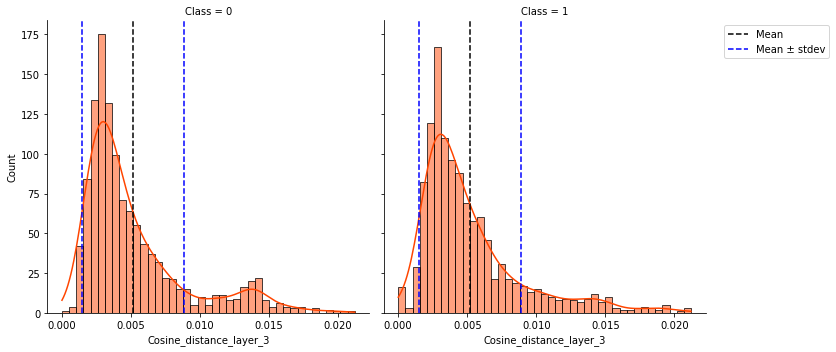

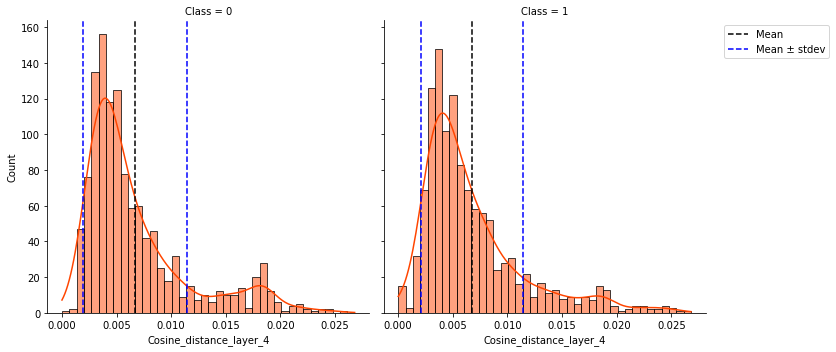

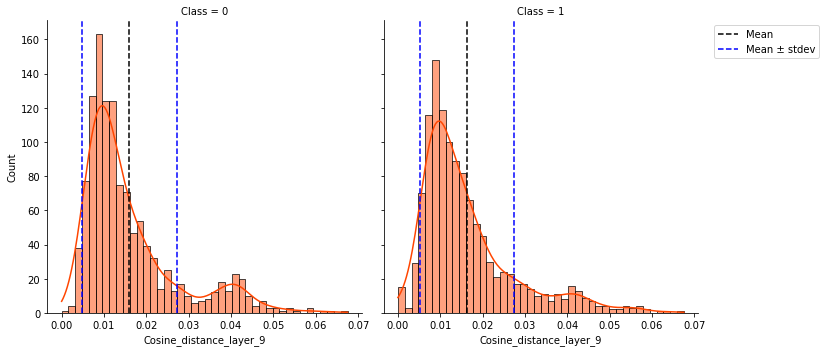

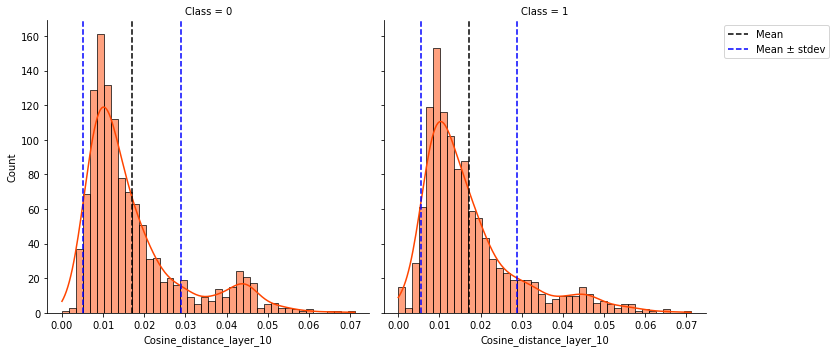

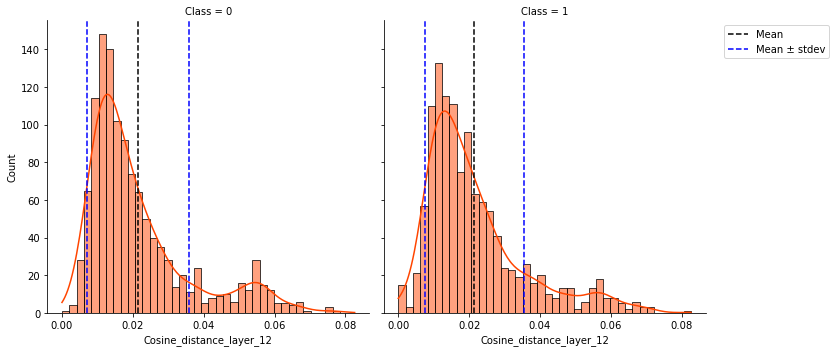

In [29]:
plot_mean_and_standard_deviation(df_dist_30_cosine_distance_no_pretrain, 'count', 'orangered')

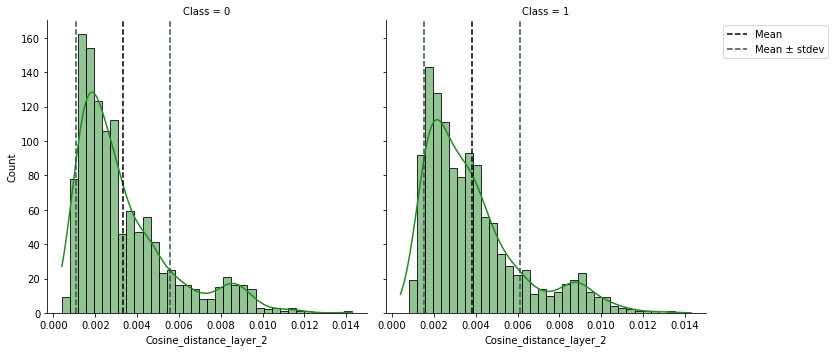

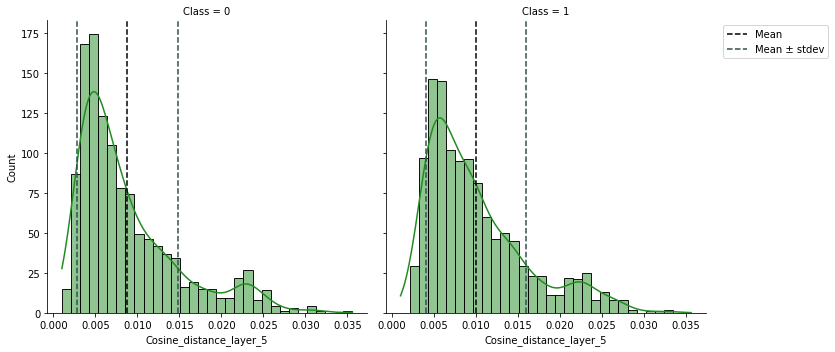

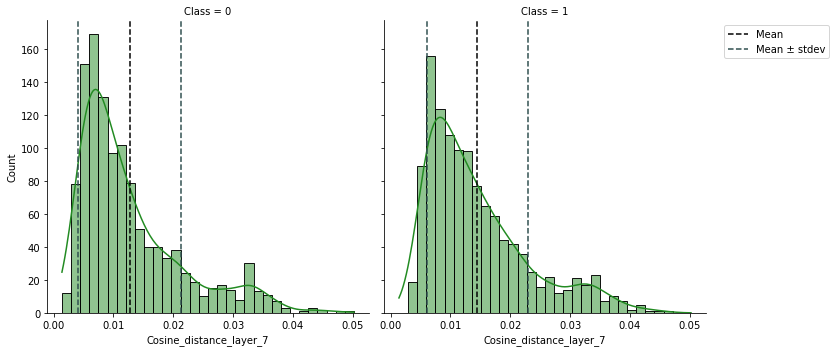

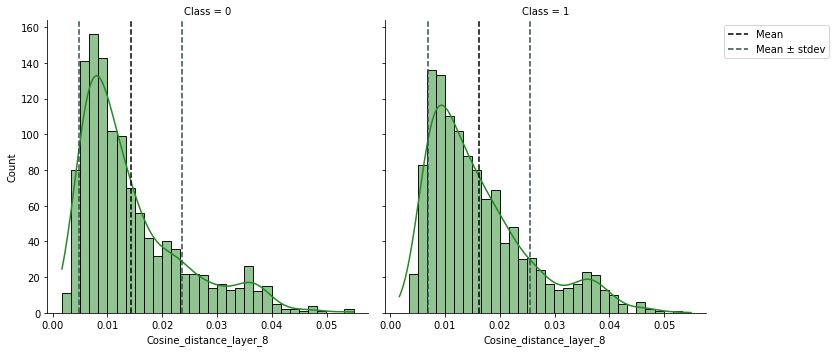

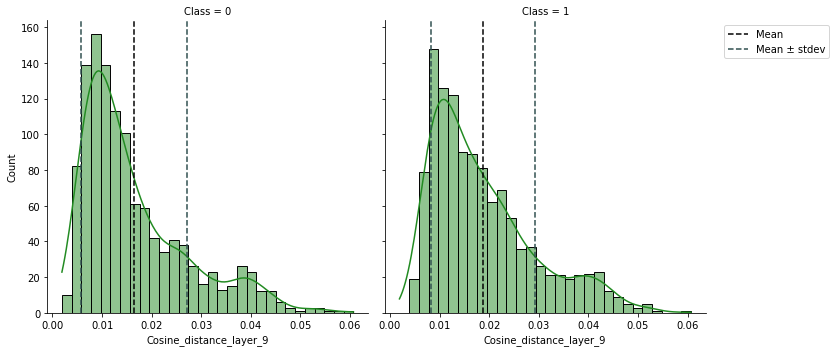

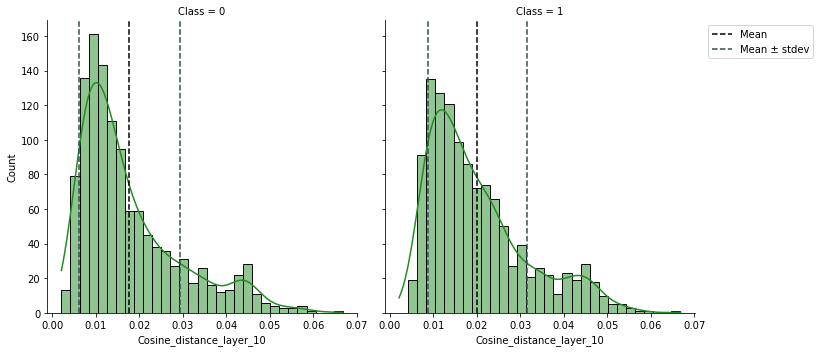

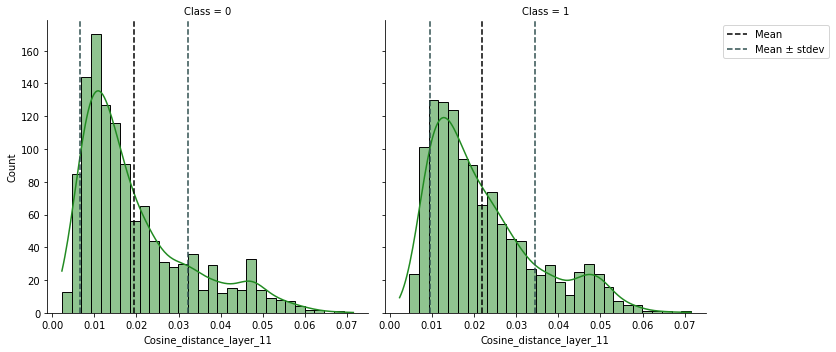

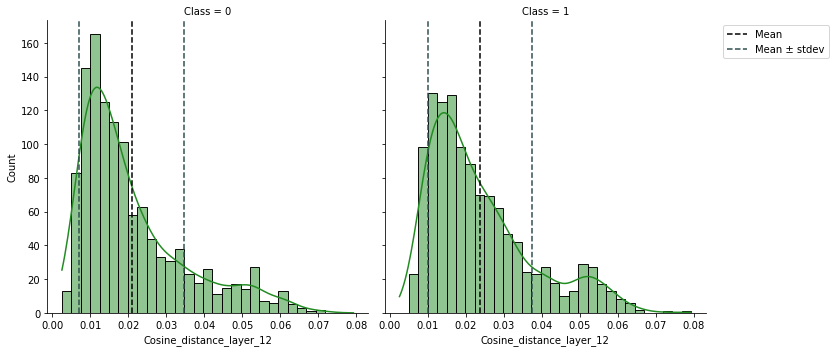

In [30]:
plot_mean_and_standard_deviation(df_random_speech_cosine_distance_no_pretrain, 'count', 'forestgreen')

### Density

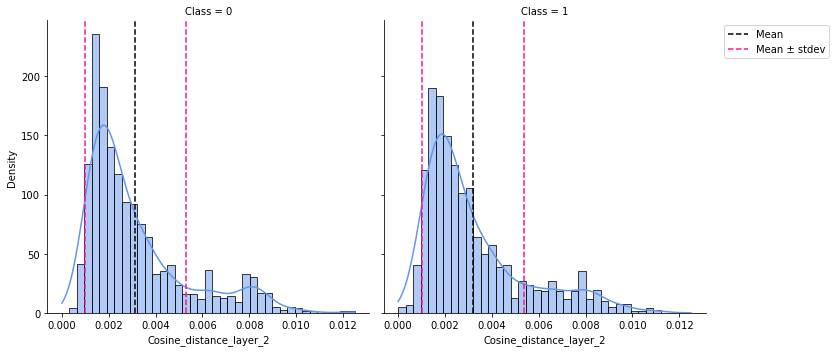

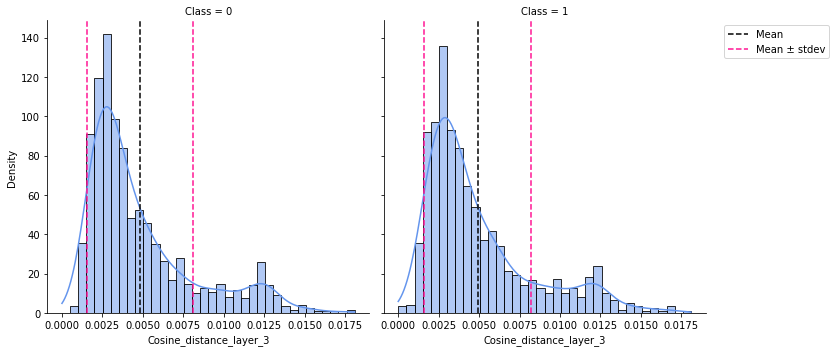

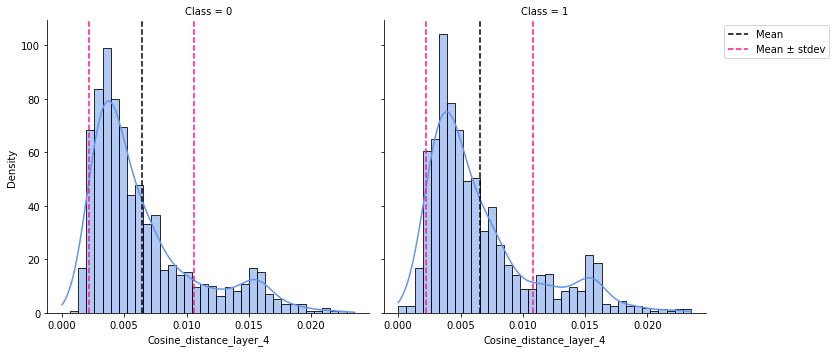

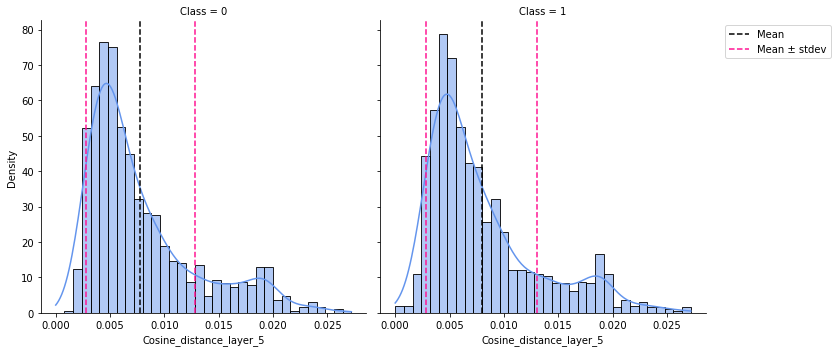

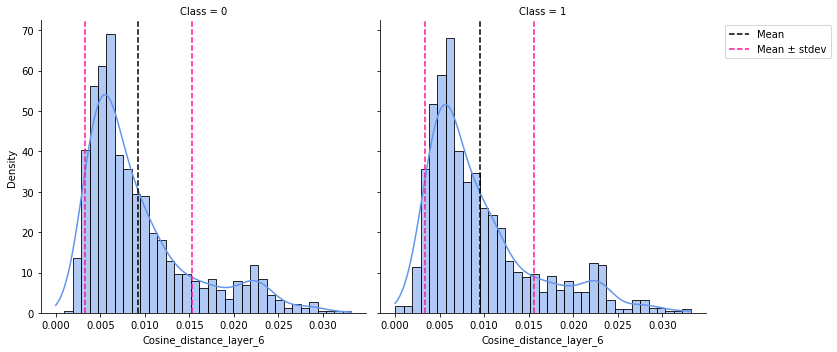

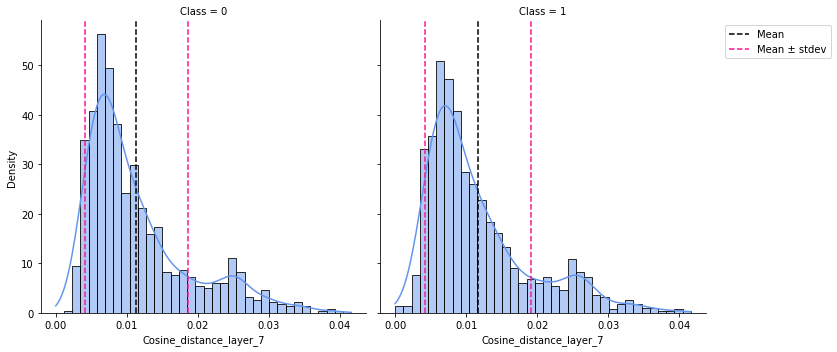

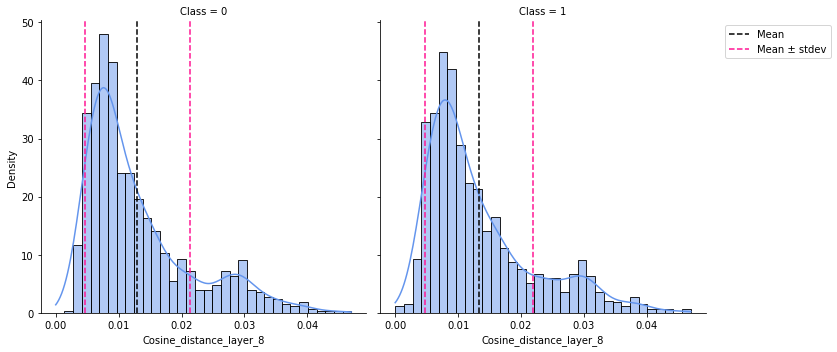

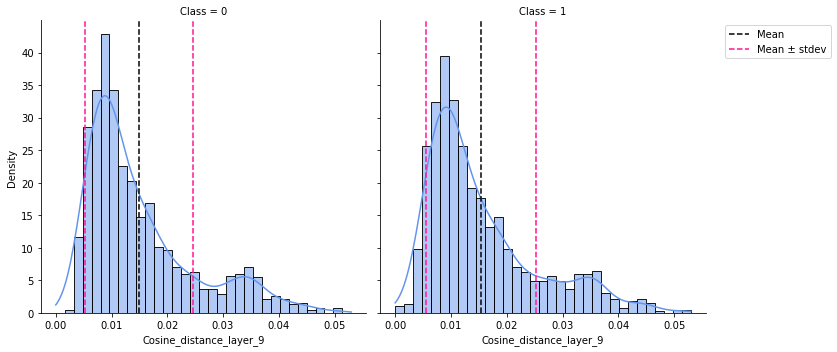

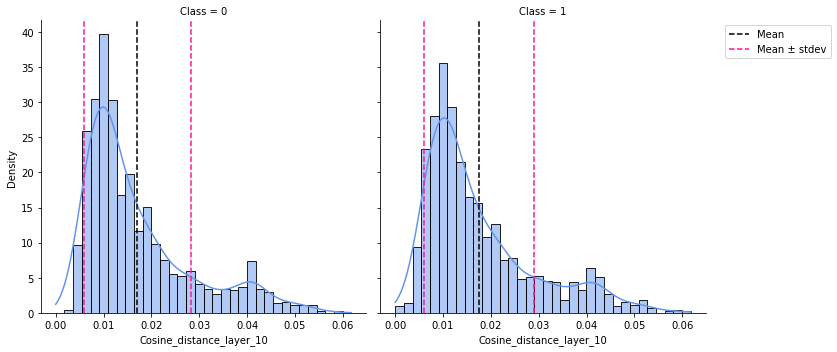

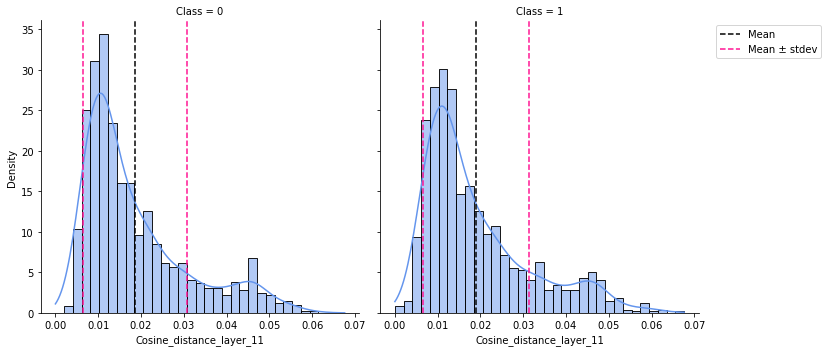

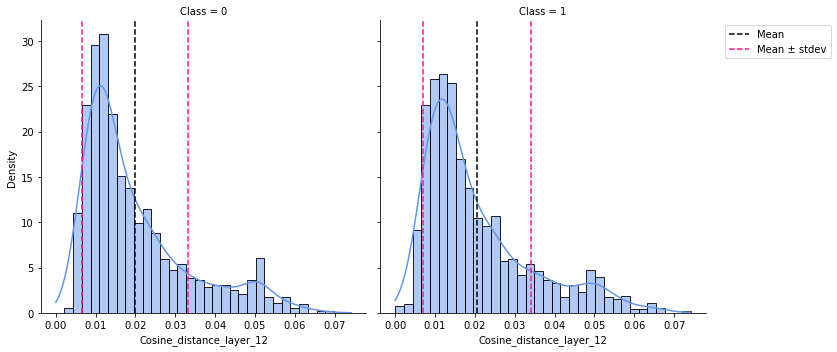

In [31]:
plot_mean_and_standard_deviation(df_dist_5_cosine_distance_no_pretrain, 'density', 'cornflowerblue')

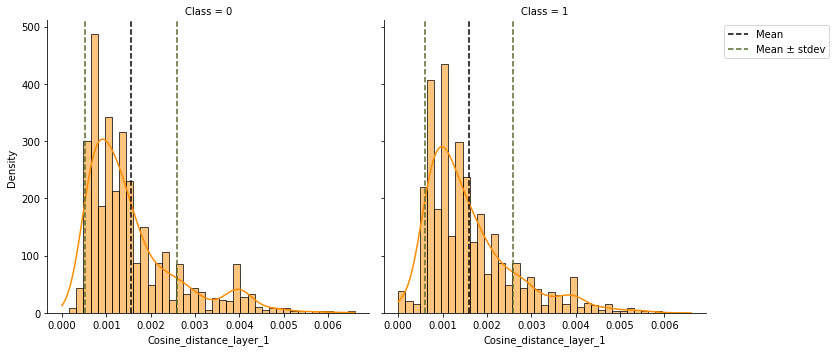

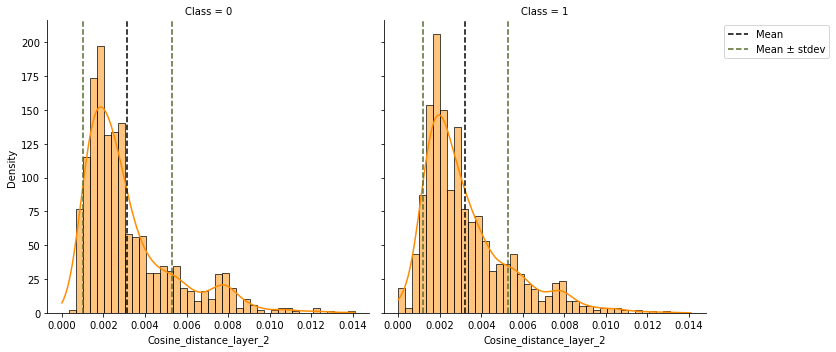

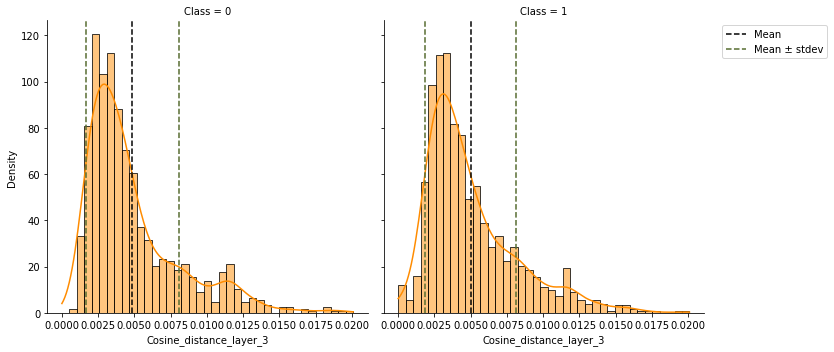

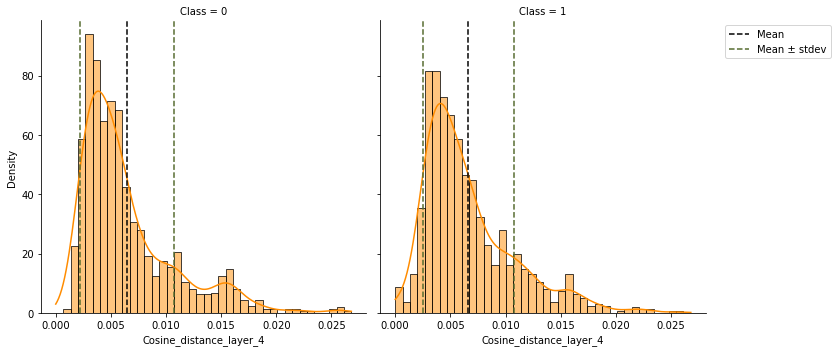

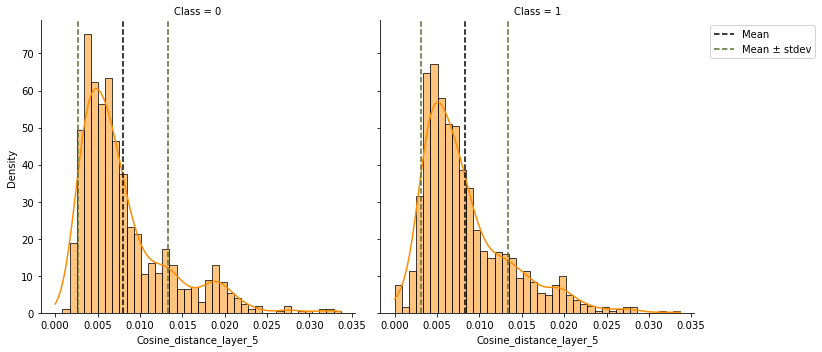

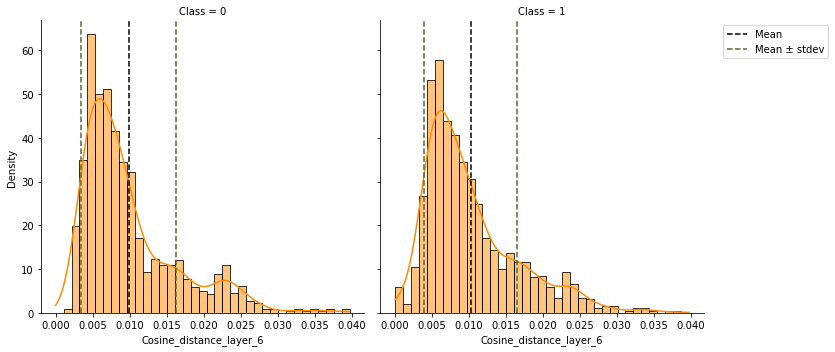

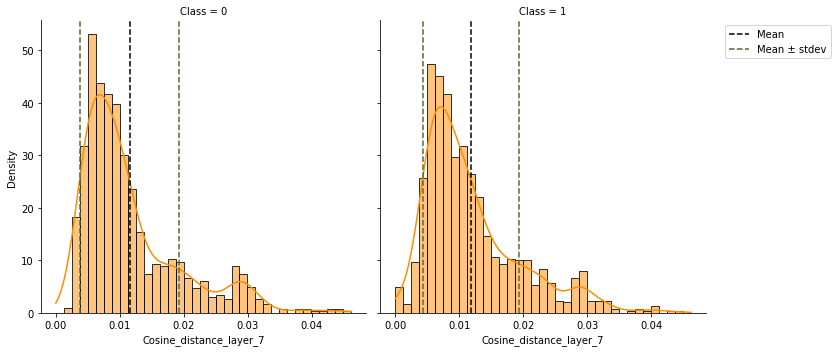

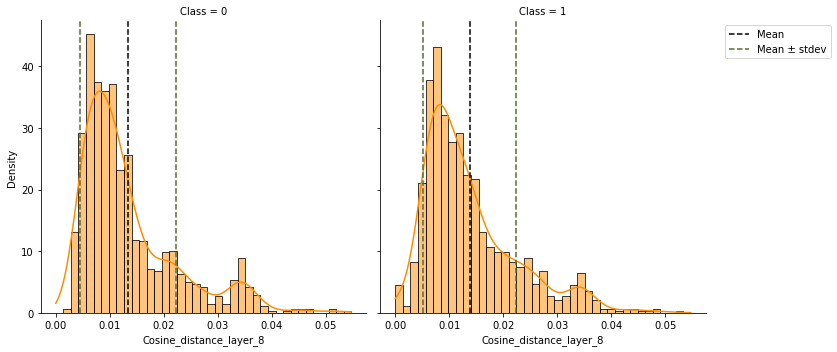

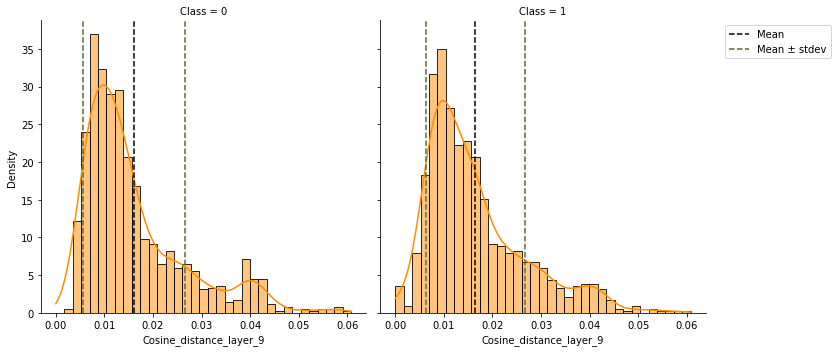

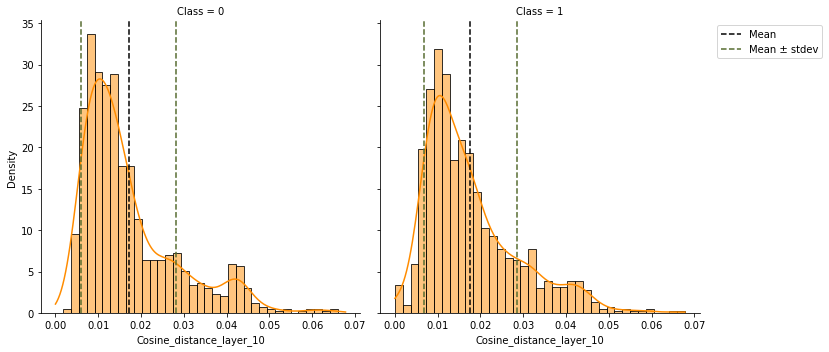

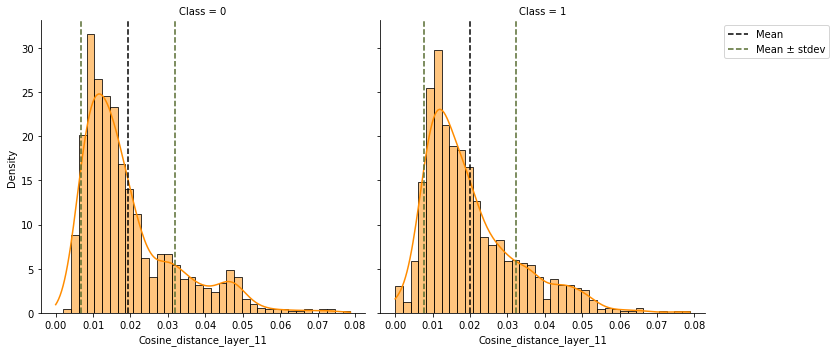

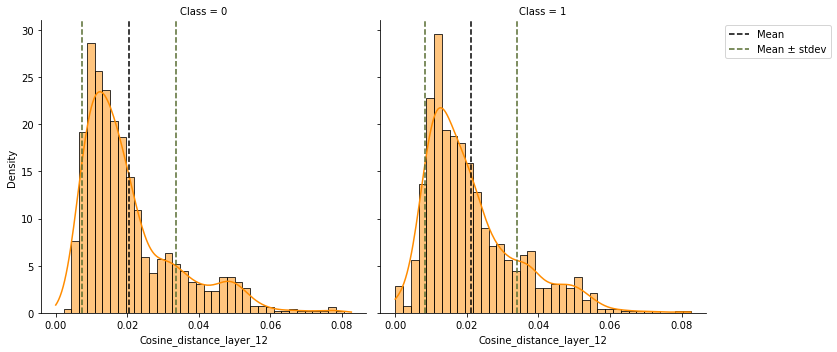

In [32]:
plot_mean_and_standard_deviation(df_dist_10_cosine_distance_no_pretrain, 'density', 'darkorange')

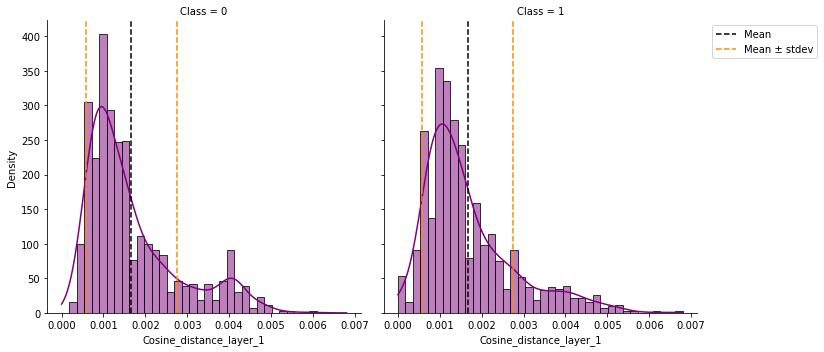

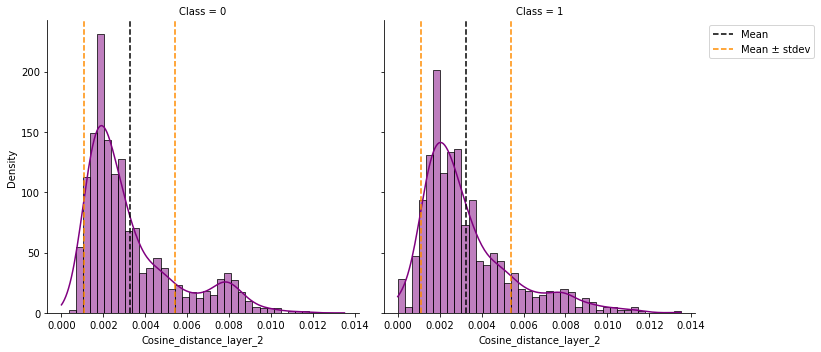

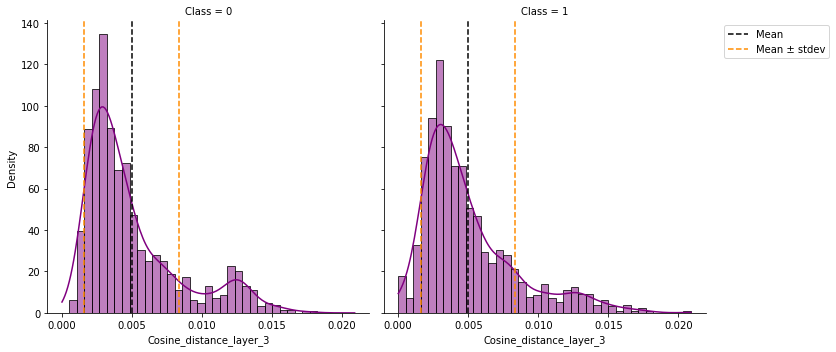

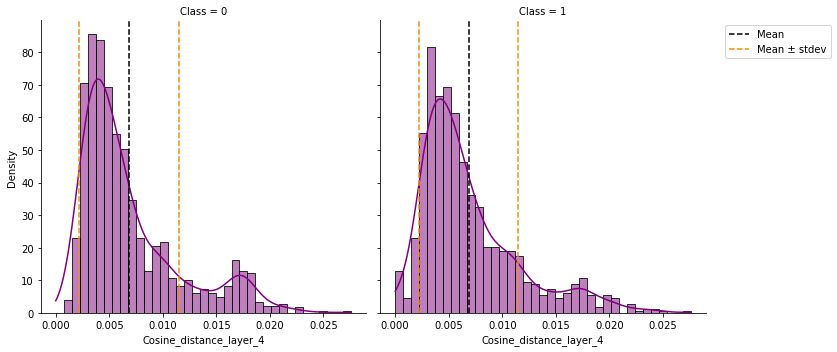

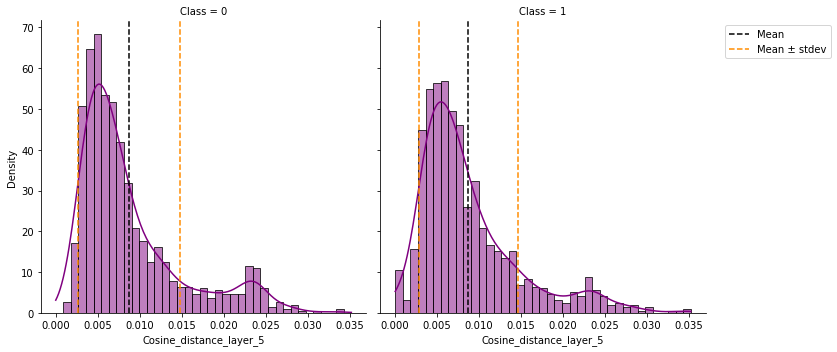

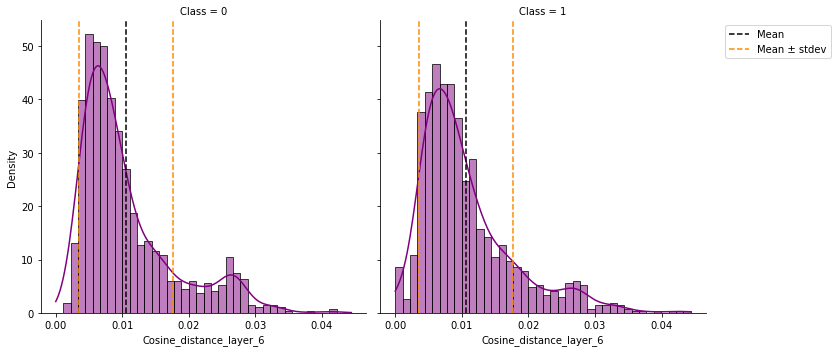

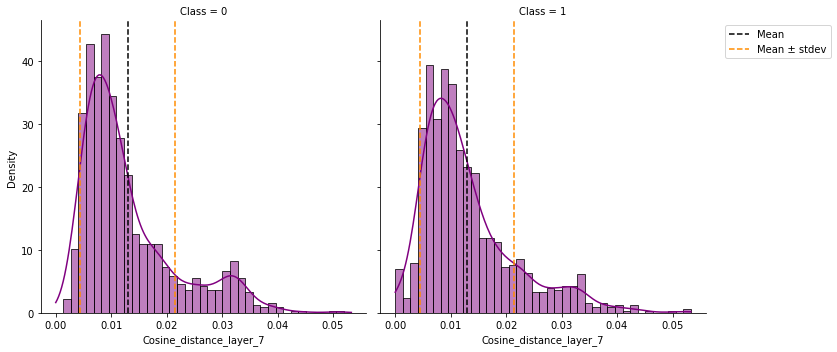

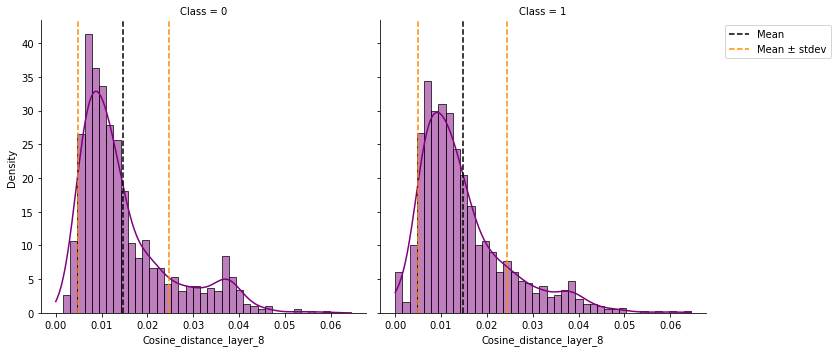

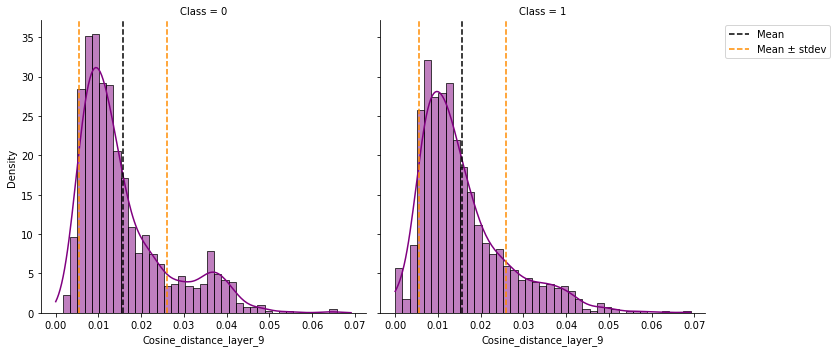

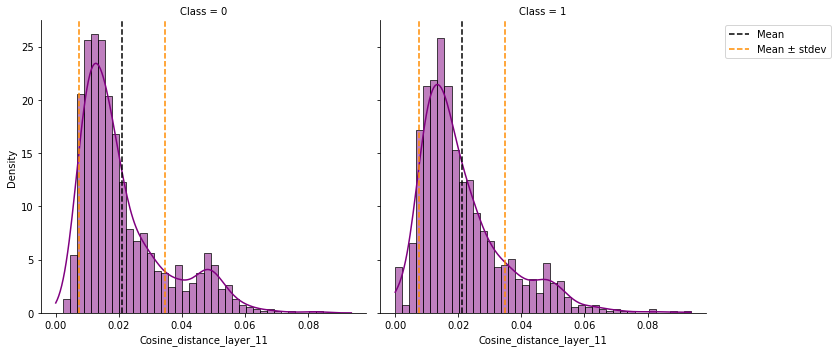

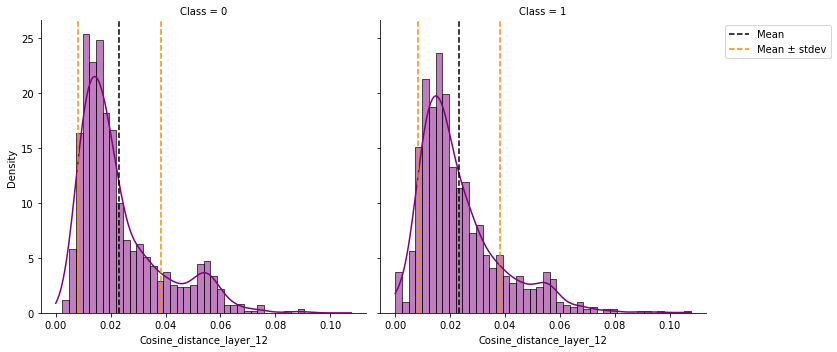

In [33]:
plot_mean_and_standard_deviation(df_dist_20_cosine_distance_no_pretrain, 'density', 'purple')

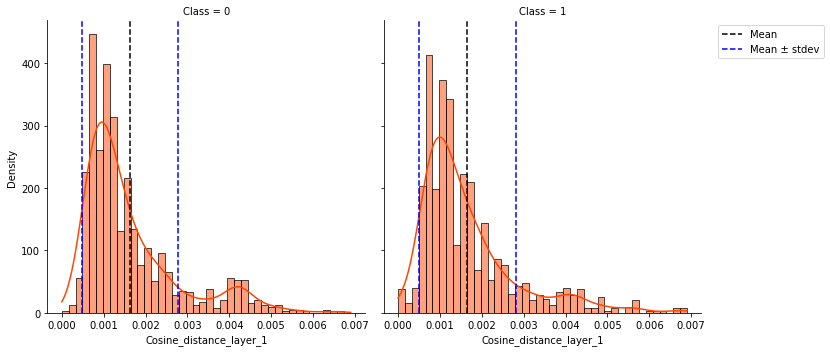

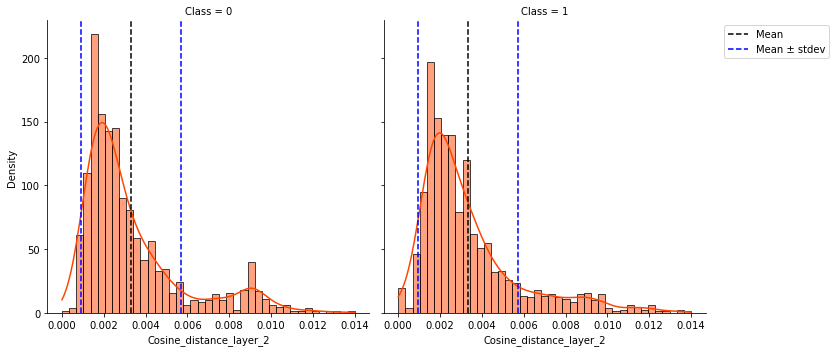

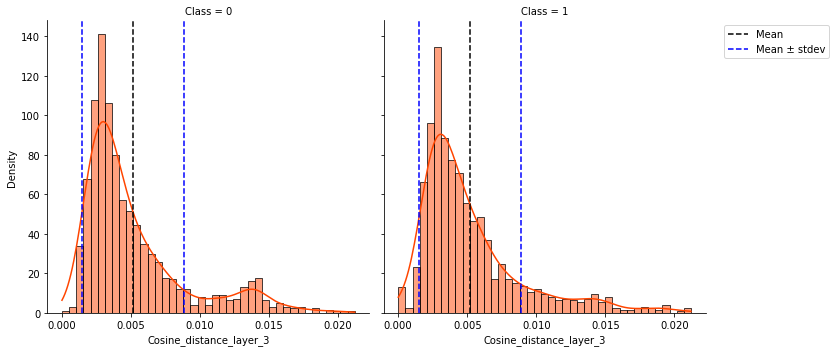

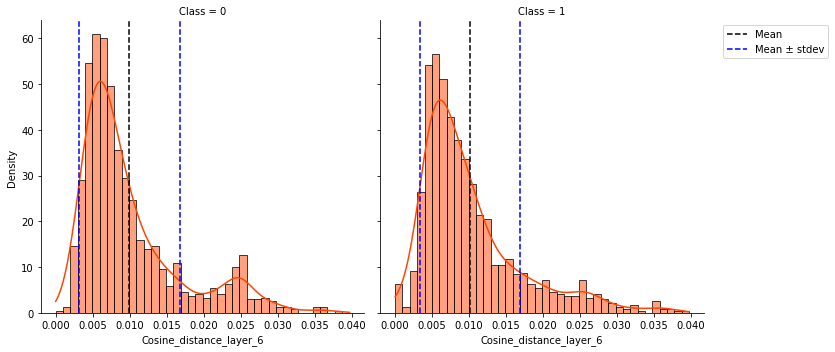

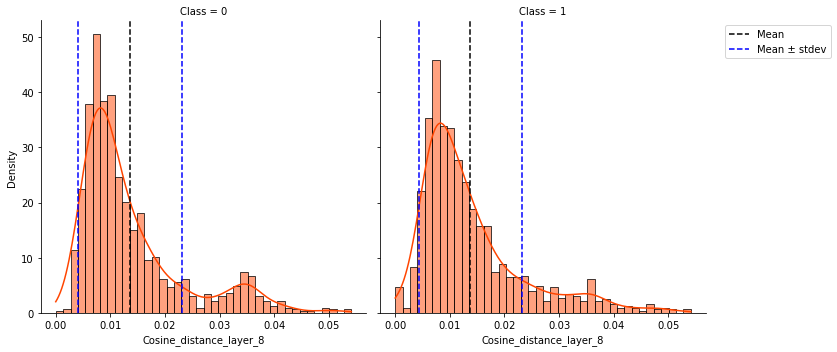

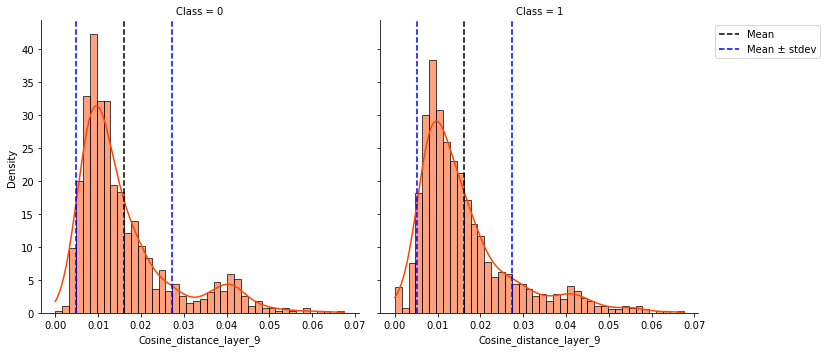

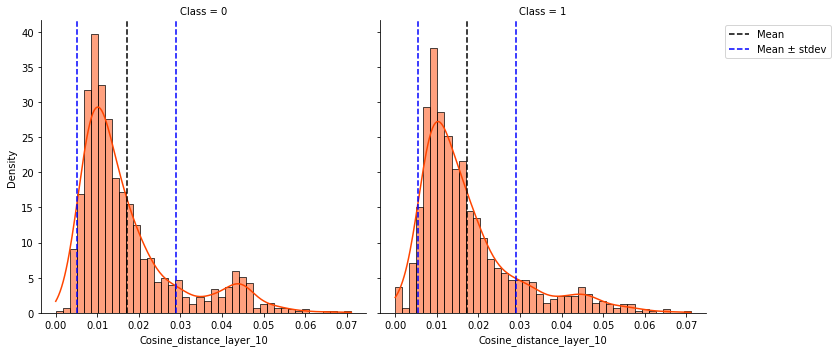

In [34]:
plot_mean_and_standard_deviation(df_dist_30_cosine_distance_no_pretrain, 'density', 'orangered')

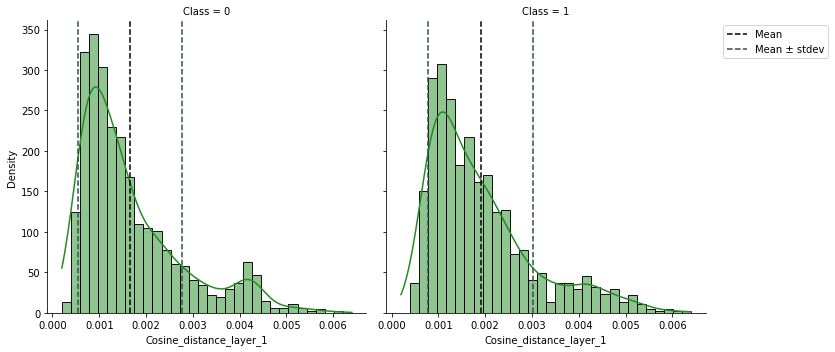

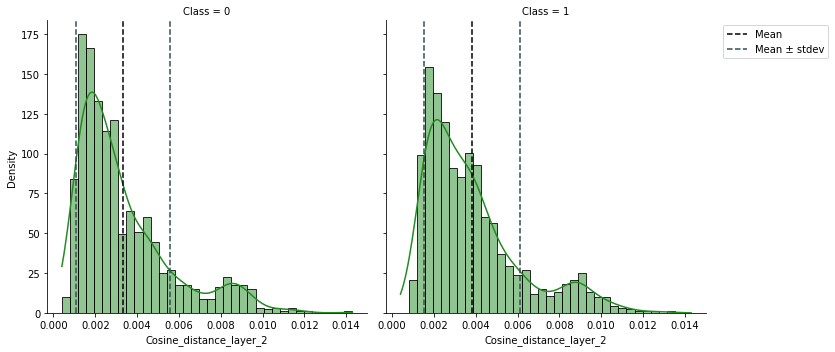

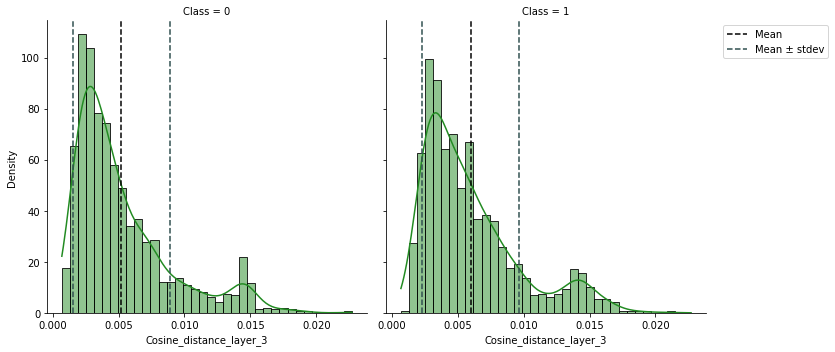

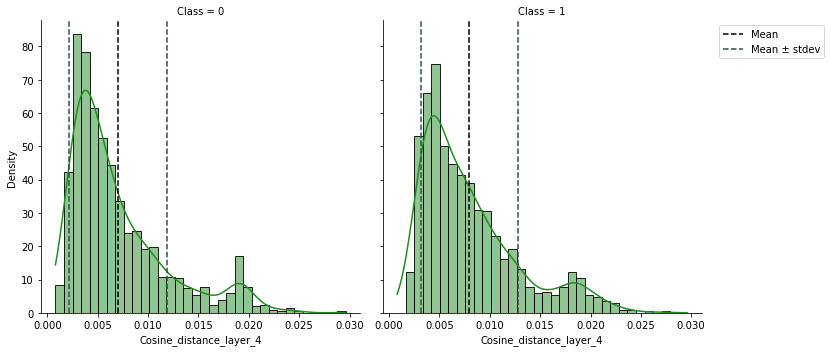

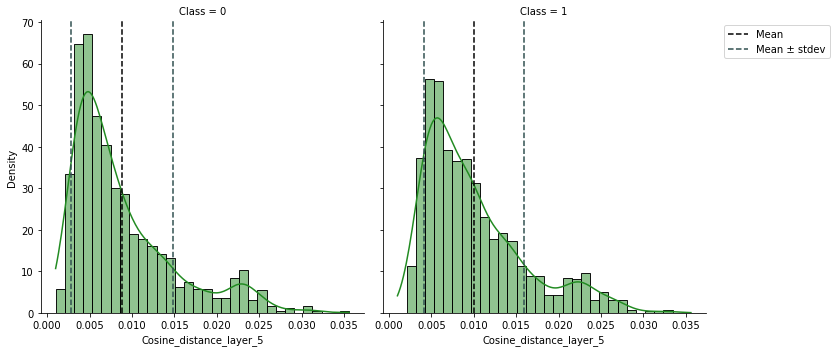

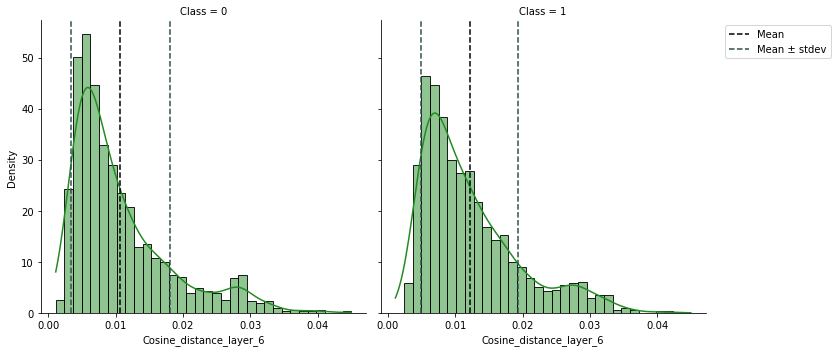

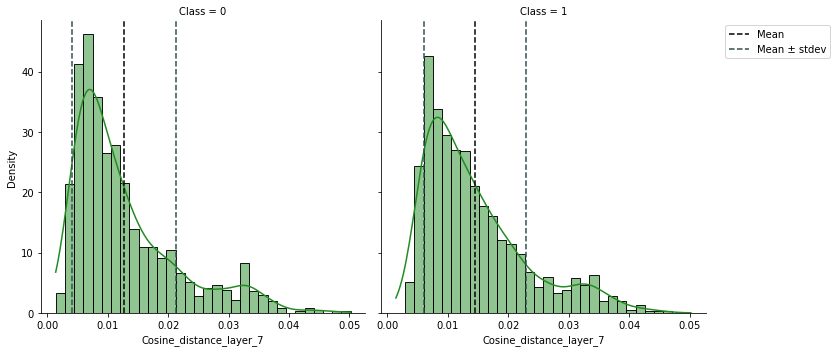

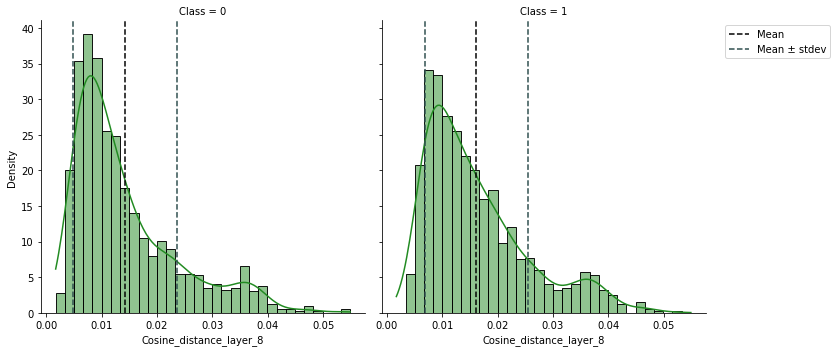

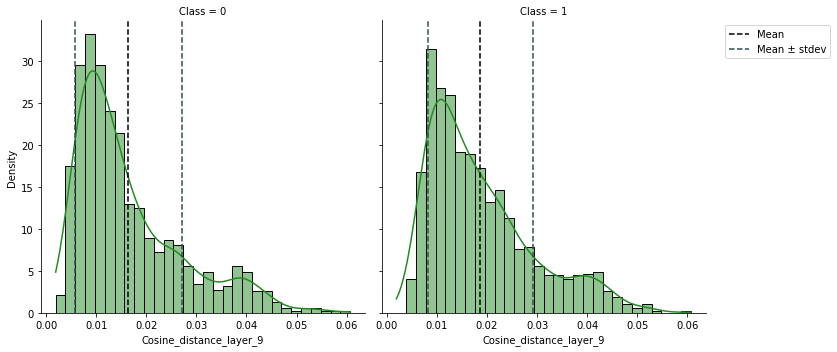

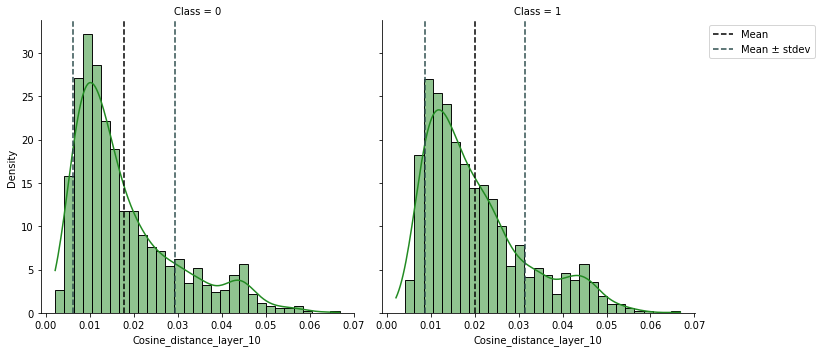

In [35]:
plot_mean_and_standard_deviation(df_random_speech_cosine_distance_no_pretrain, 'density', 'forestgreen')

In [36]:
#sns.displot(data=df_dist_5_cosine_distance, x=df_dist_5_cosine_distance['Cosine_distance_layer_1'], \
#            kind='kde', hue='Class')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0016
StDev: 0.0011
Mean: 0.0016
StDev: 0.0011


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0031
StDev: 0.0022
Mean: 0.0032
StDev: 0.0022


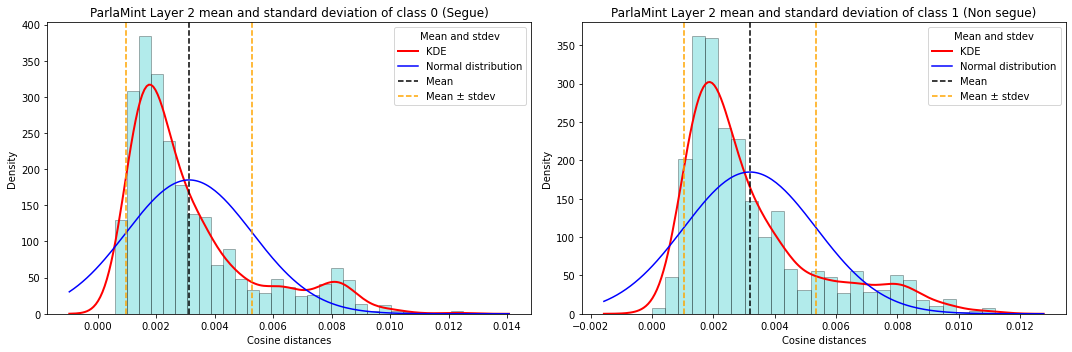

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0048
StDev: 0.0033
Mean: 0.0049
StDev: 0.0033


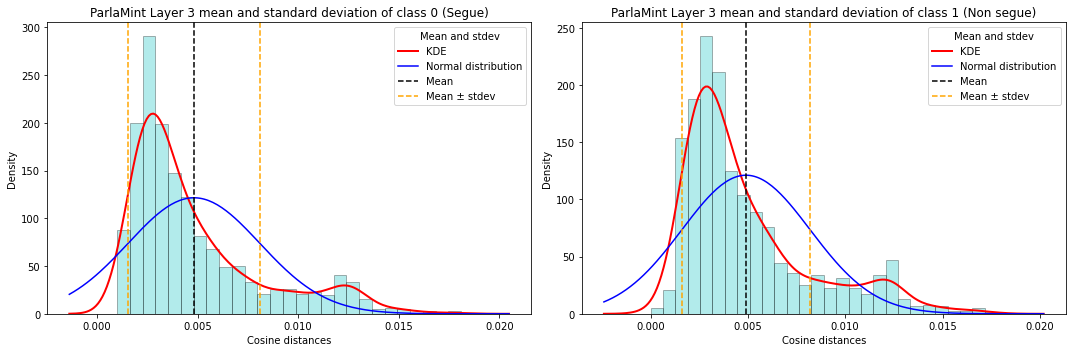

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0064
StDev: 0.0042
Mean: 0.0065
StDev: 0.0043


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0078
StDev: 0.0050
Mean: 0.0080
StDev: 0.0051


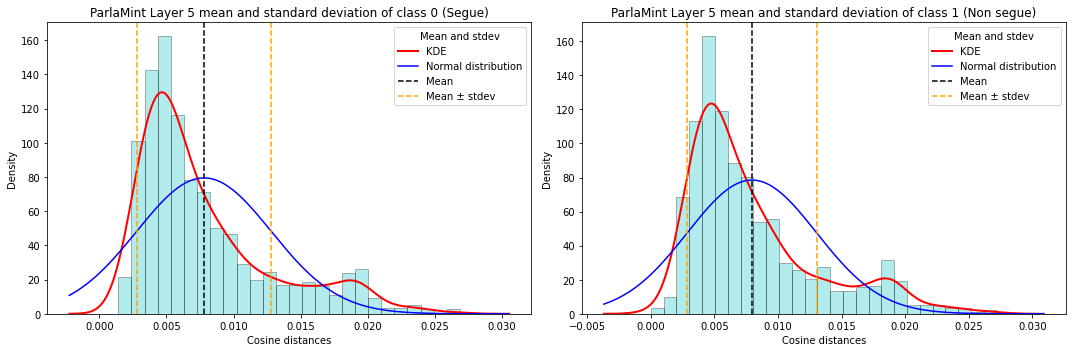

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0093
StDev: 0.0060
Mean: 0.0095
StDev: 0.0061


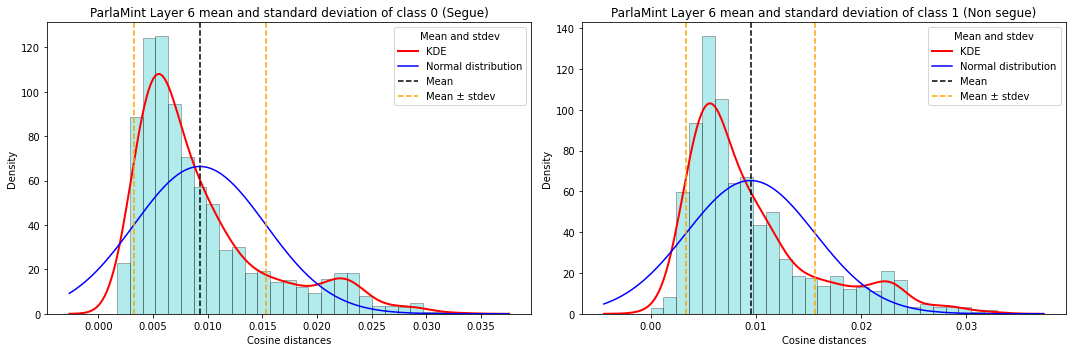

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0114
StDev: 0.0072
Mean: 0.0117
StDev: 0.0074


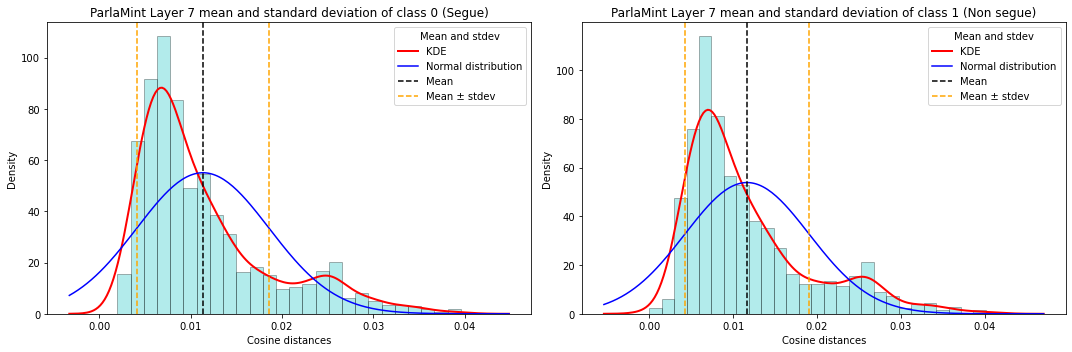

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0130
StDev: 0.0084
Mean: 0.0133
StDev: 0.0086


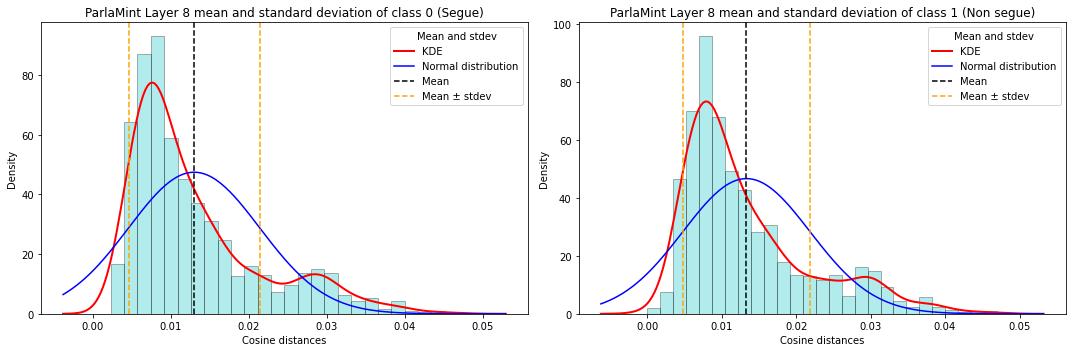

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0150
StDev: 0.0097
Mean: 0.0154
StDev: 0.0099


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0170
StDev: 0.0112
Mean: 0.0175
StDev: 0.0114


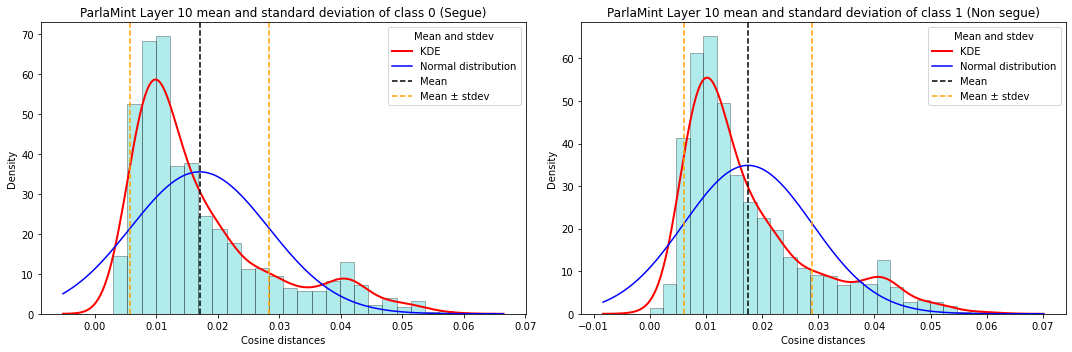

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0185
StDev: 0.0121
Mean: 0.0190
StDev: 0.0124


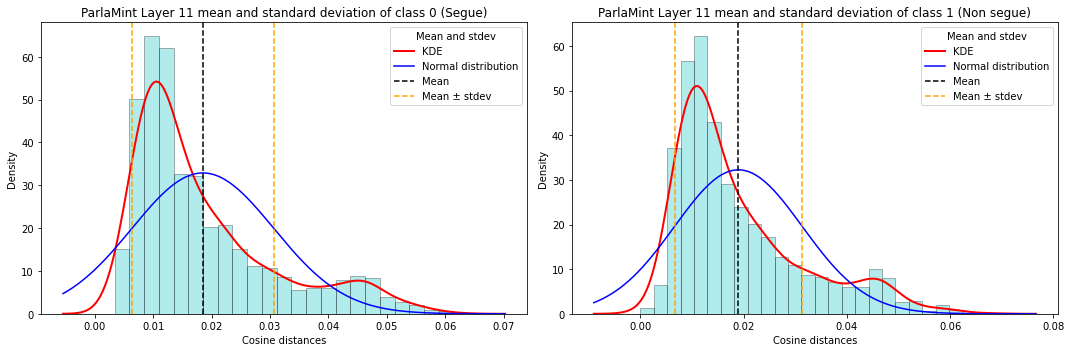

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0199
StDev: 0.0133
Mean: 0.0205
StDev: 0.0136


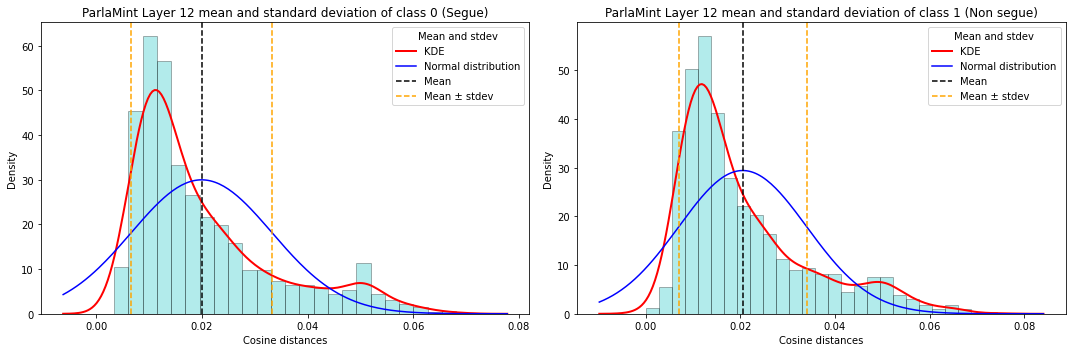

In [37]:
plot_mean_and_stdev(df_dist_5_cosine_distance_no_pretrain)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0016
StDev: 0.0010
Mean: 0.0016
StDev: 0.0010


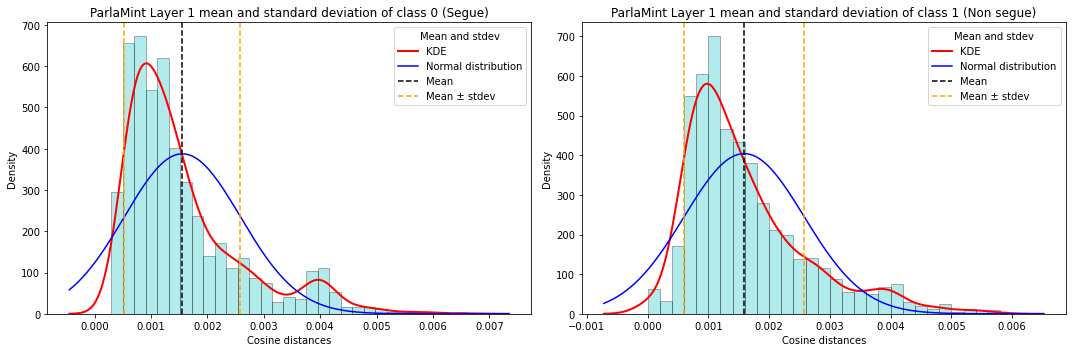

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0032
StDev: 0.0021
Mean: 0.0032
StDev: 0.0021


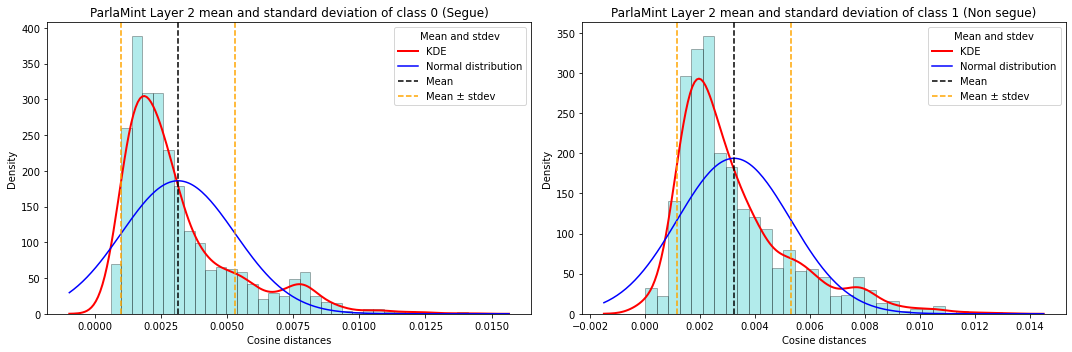

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0049
StDev: 0.0032
Mean: 0.0050
StDev: 0.0031


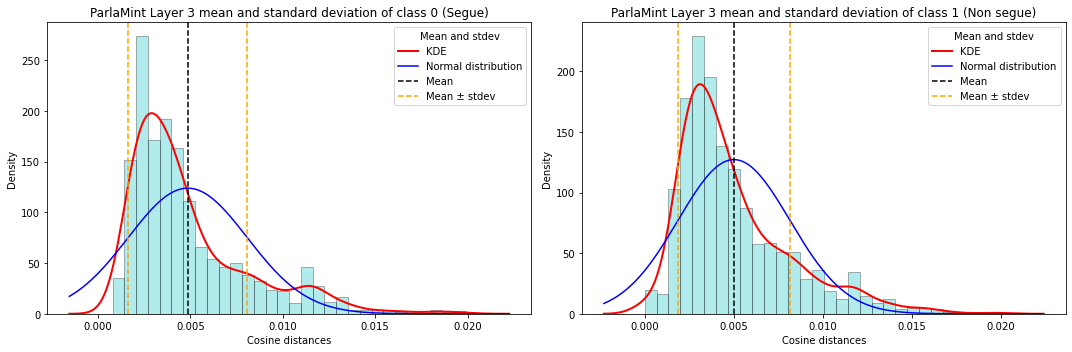

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0064
StDev: 0.0043
Mean: 0.0066
StDev: 0.0041


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0080
StDev: 0.0053
Mean: 0.0083
StDev: 0.0052


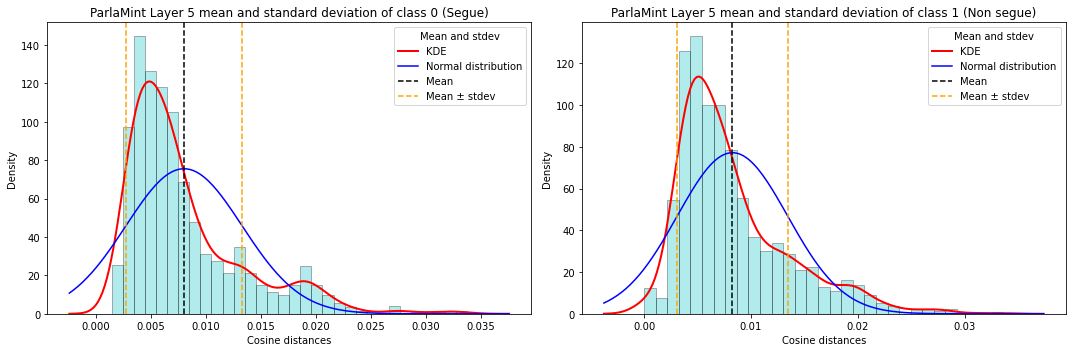

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0099
StDev: 0.0064
Mean: 0.0102
StDev: 0.0063


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0116
StDev: 0.0077
Mean: 0.0119
StDev: 0.0075


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0134
StDev: 0.0089
Mean: 0.0138
StDev: 0.0086


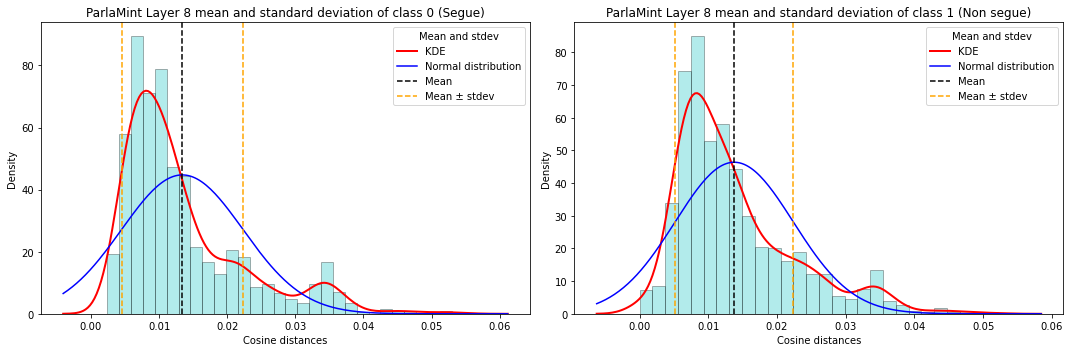

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0160
StDev: 0.0105
Mean: 0.0164
StDev: 0.0102


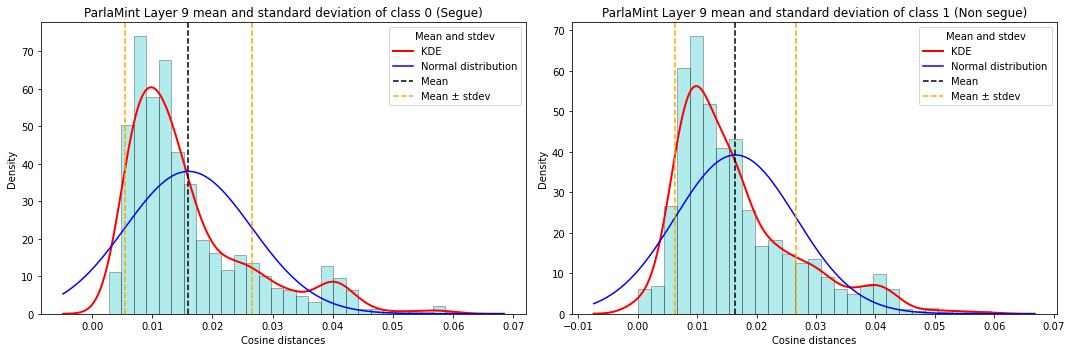

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0171
StDev: 0.0111
Mean: 0.0176
StDev: 0.0108


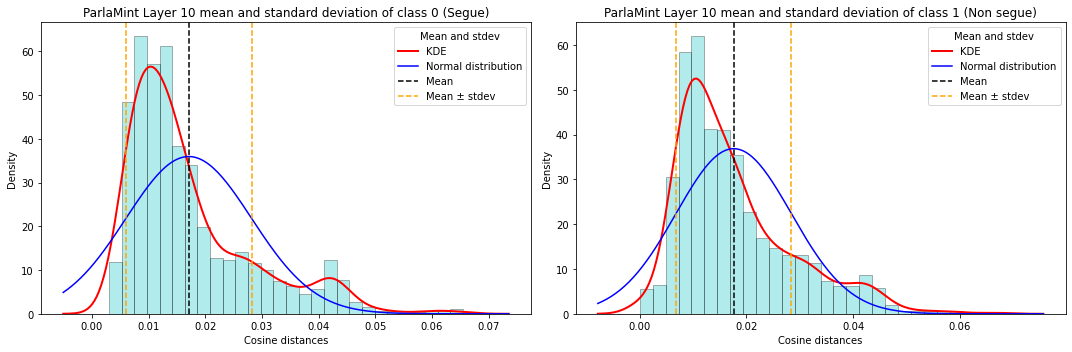

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0194
StDev: 0.0126
Mean: 0.0200
StDev: 0.0124


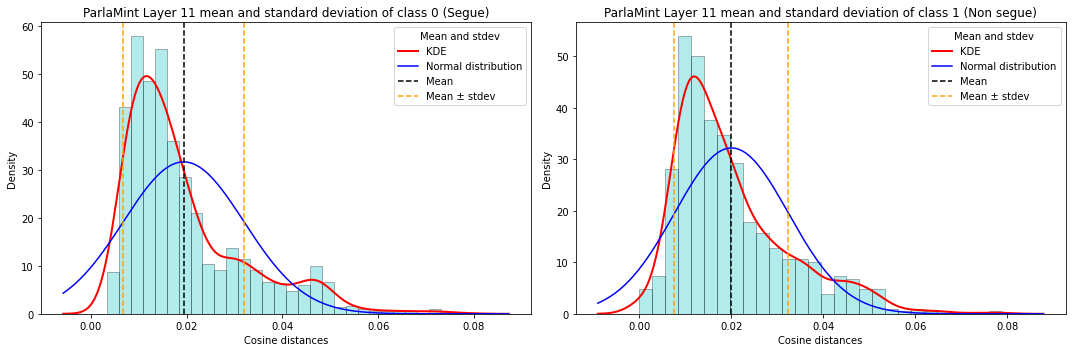

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0205
StDev: 0.0132
Mean: 0.0211
StDev: 0.0129


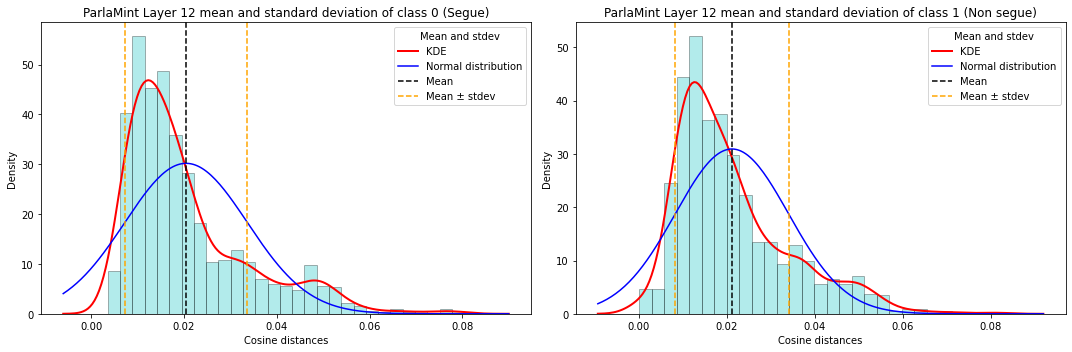

In [38]:
plot_mean_and_stdev(df_dist_10_cosine_distance_no_pretrain)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0017
StDev: 0.0011
Mean: 0.0017
StDev: 0.0011


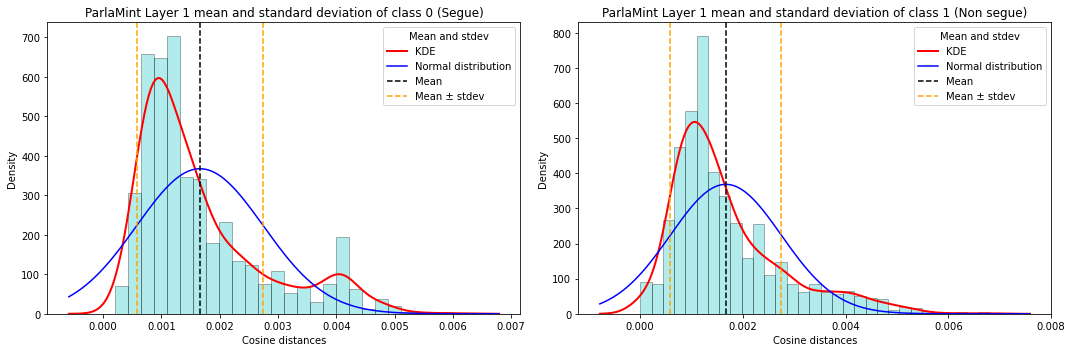

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0032
StDev: 0.0022
Mean: 0.0033
StDev: 0.0022


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0050
StDev: 0.0034
Mean: 0.0050
StDev: 0.0034


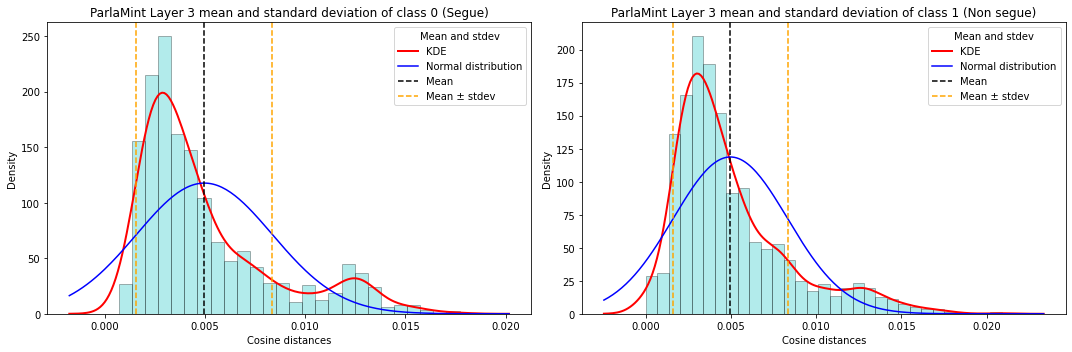

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0068
StDev: 0.0047
Mean: 0.0069
StDev: 0.0046


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0087
StDev: 0.0061
Mean: 0.0087
StDev: 0.0059


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0106
StDev: 0.0071
Mean: 0.0106
StDev: 0.0070


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0130
StDev: 0.0085
Mean: 0.0130
StDev: 0.0085


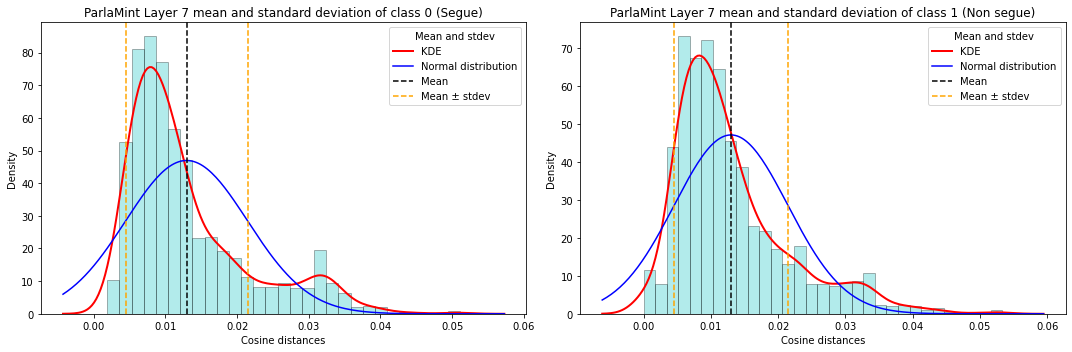

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0148
StDev: 0.0099
Mean: 0.0147
StDev: 0.0098


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0157
StDev: 0.0103
Mean: 0.0157
StDev: 0.0102


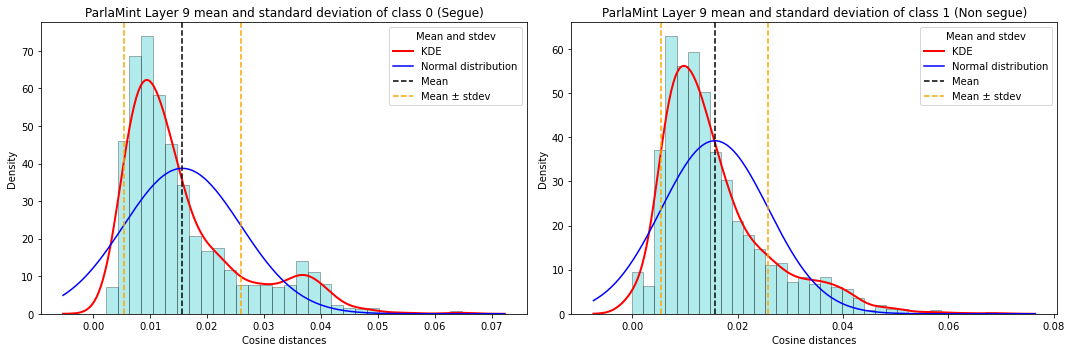

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0184
StDev: 0.0118
Mean: 0.0185
StDev: 0.0118


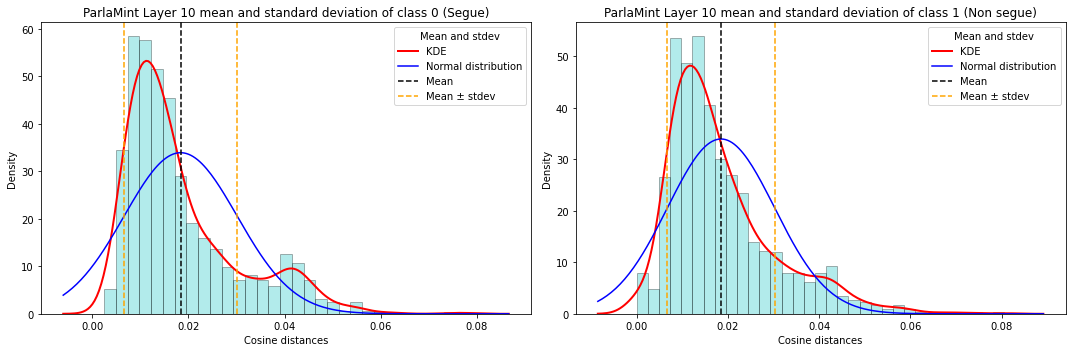

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0210
StDev: 0.0136
Mean: 0.0211
StDev: 0.0136


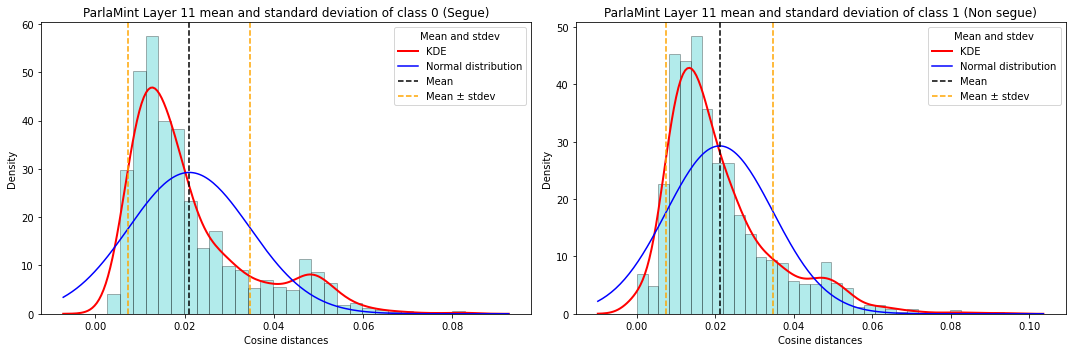

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0231
StDev: 0.0151
Mean: 0.0232
StDev: 0.0150


In [39]:
plot_mean_and_stdev(df_dist_20_cosine_distance_no_pretrain)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0016
StDev: 0.0011
Mean: 0.0017
StDev: 0.0012


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0033
StDev: 0.0024
Mean: 0.0033
StDev: 0.0024


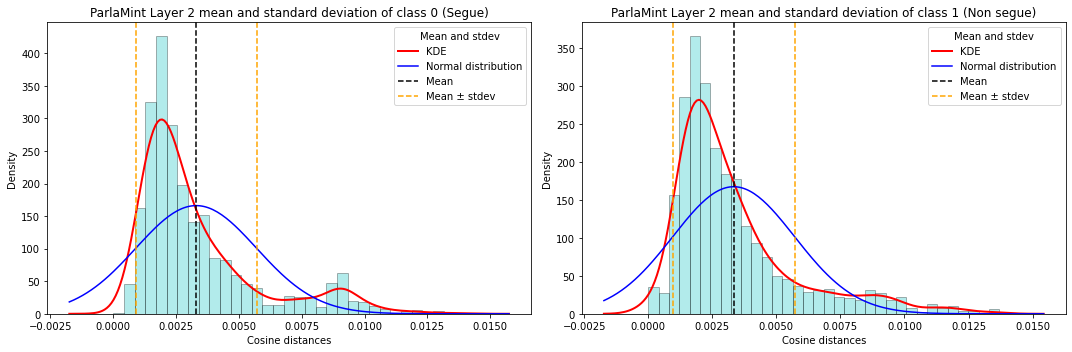

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0051
StDev: 0.0037
Mean: 0.0052
StDev: 0.0037


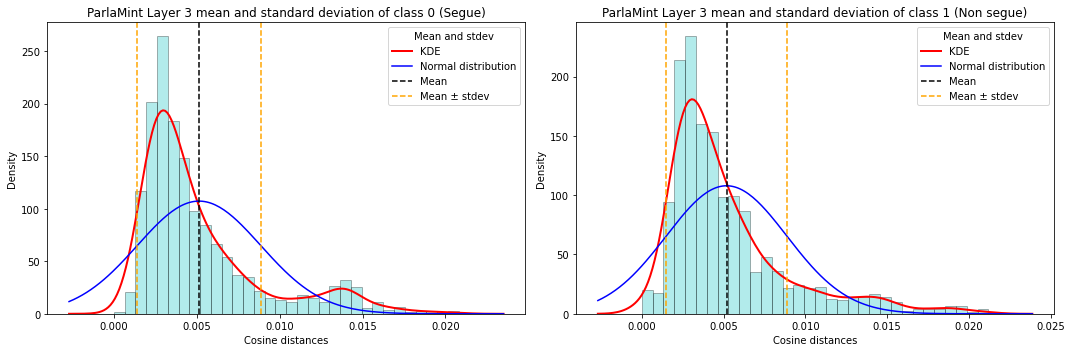

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0067
StDev: 0.0047
Mean: 0.0067
StDev: 0.0047


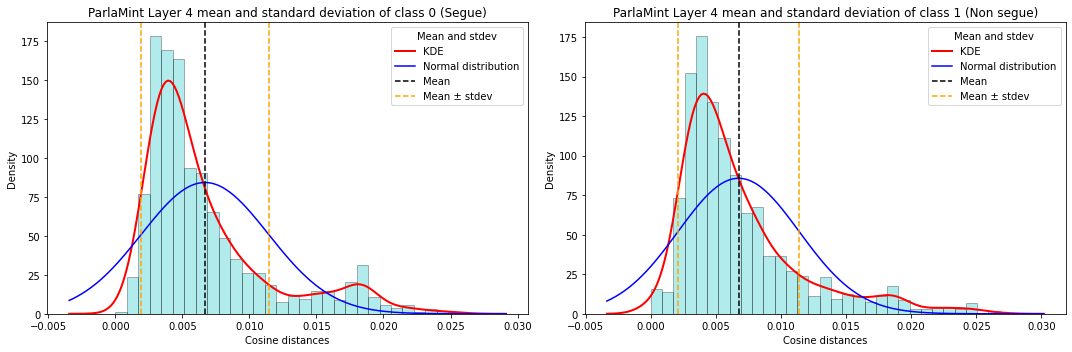

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0082
StDev: 0.0057
Mean: 0.0083
StDev: 0.0057


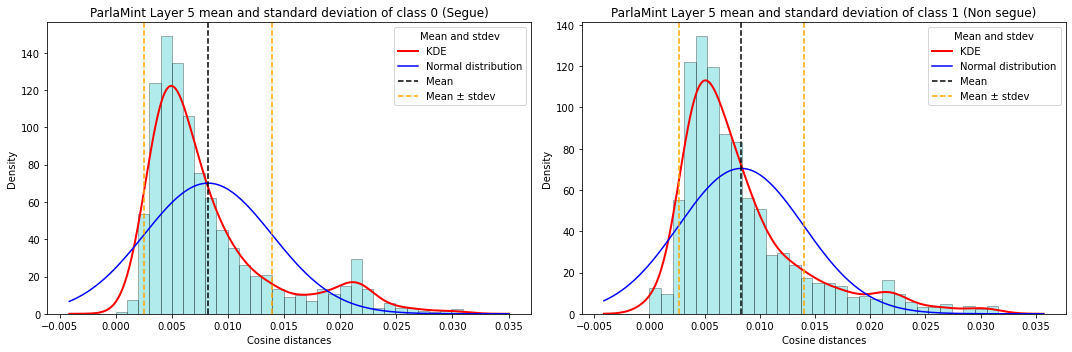

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0100
StDev: 0.0068
Mean: 0.0101
StDev: 0.0068


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0121
StDev: 0.0084
Mean: 0.0122
StDev: 0.0084


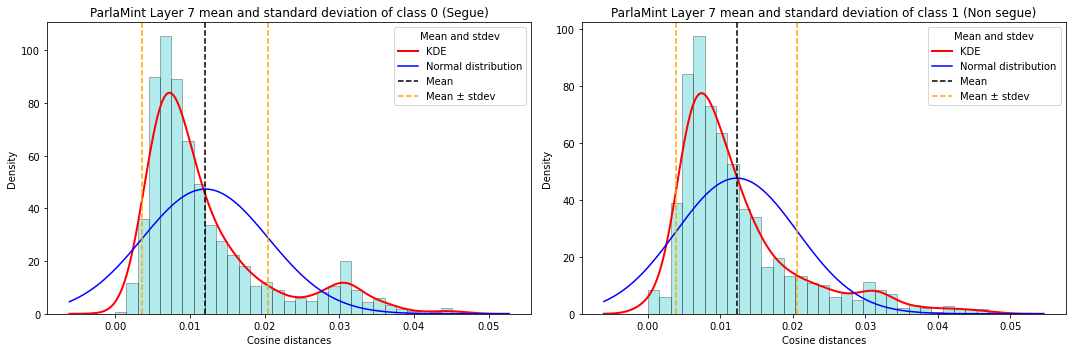

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0136
StDev: 0.0095
Mean: 0.0138
StDev: 0.0094


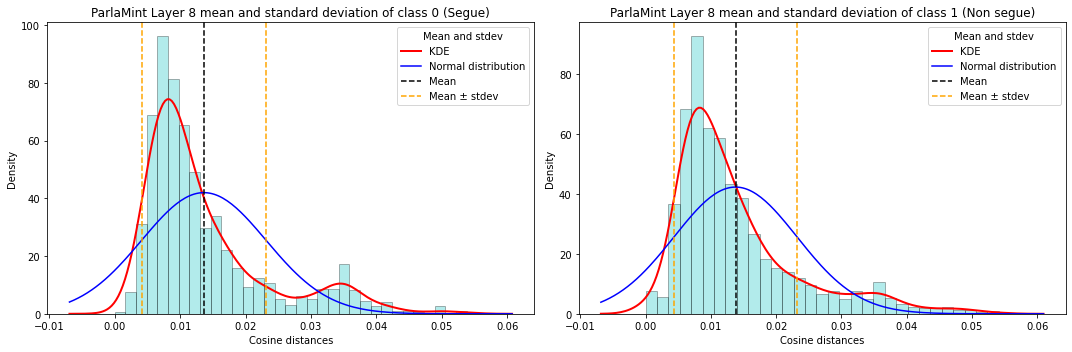

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0160
StDev: 0.0112
Mean: 0.0162
StDev: 0.0111


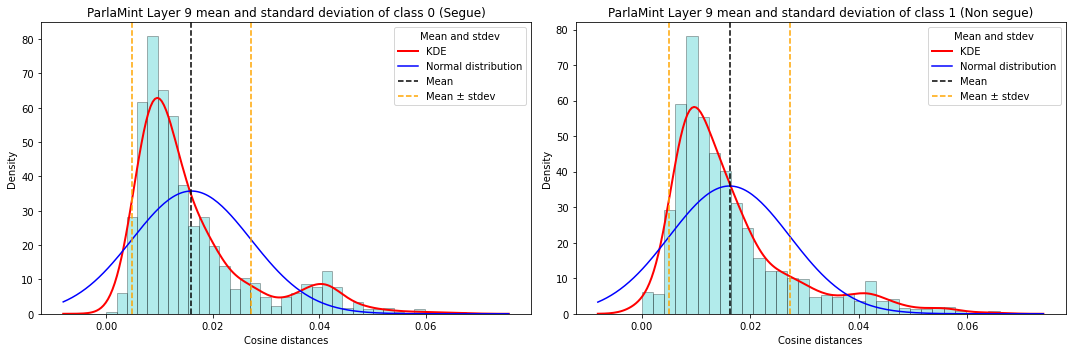

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0171
StDev: 0.0119
Mean: 0.0172
StDev: 0.0117


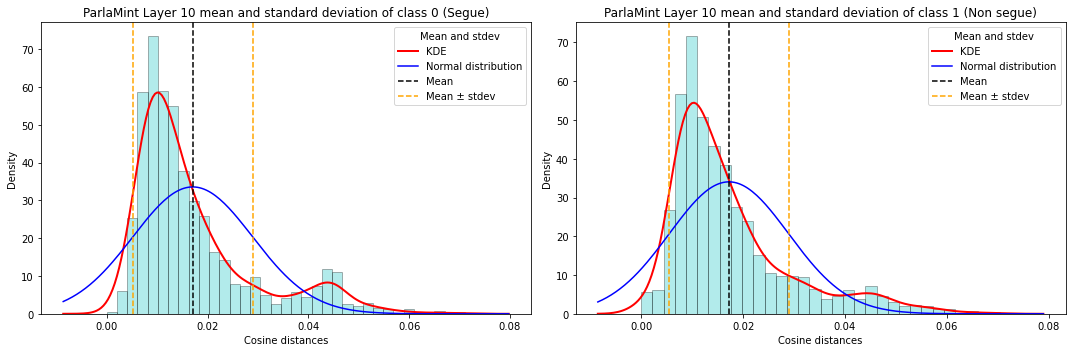

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0187
StDev: 0.0128
Mean: 0.0188
StDev: 0.0125


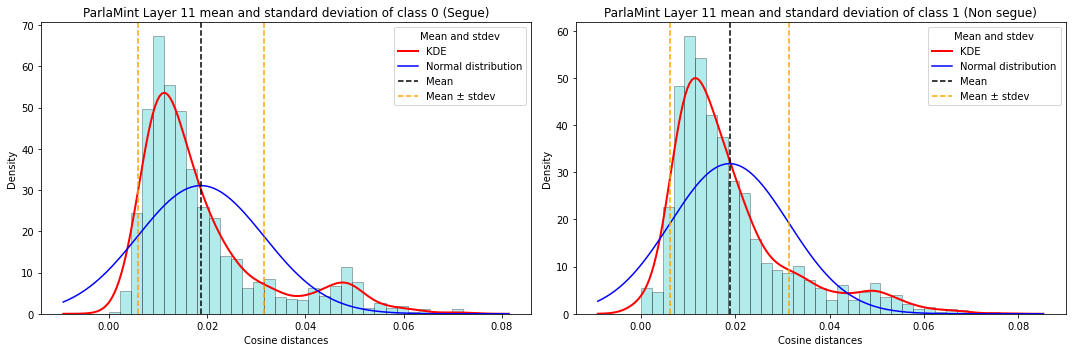

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0214
StDev: 0.0144
Mean: 0.0215
StDev: 0.0139


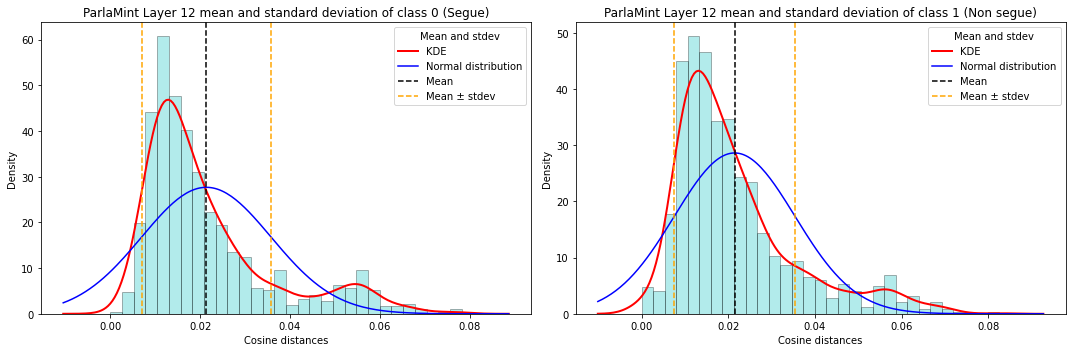

In [40]:
plot_mean_and_stdev(df_dist_30_cosine_distance_no_pretrain)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0017
StDev: 0.0011
Mean: 0.0019
StDev: 0.0011


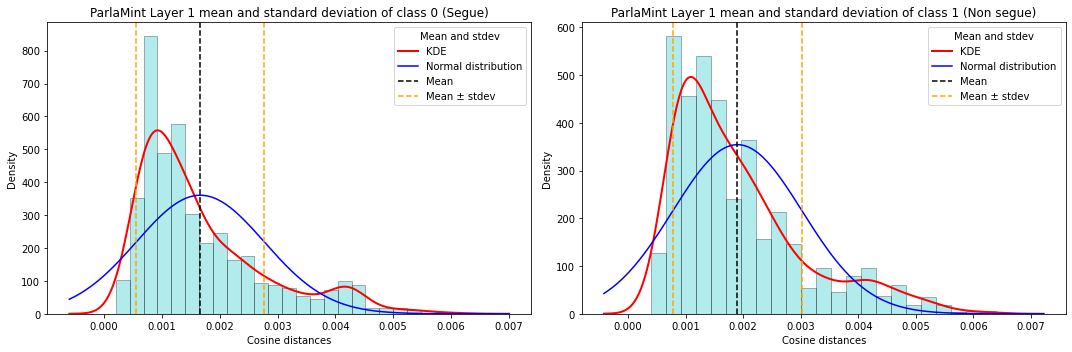

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0033
StDev: 0.0023
Mean: 0.0038
StDev: 0.0023


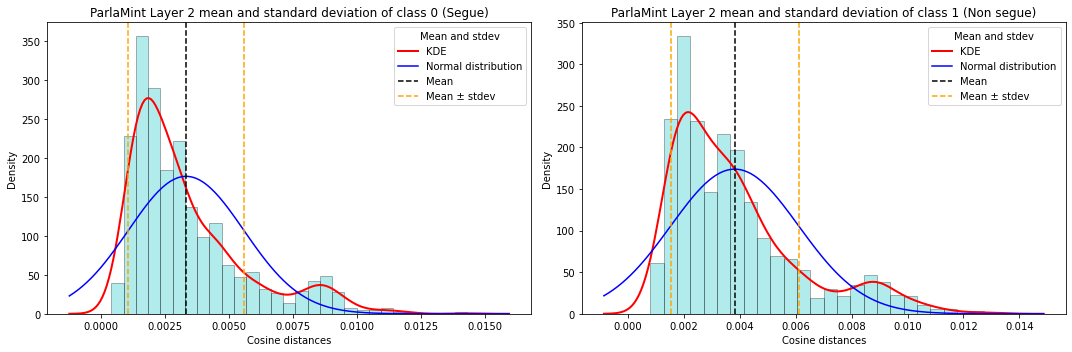

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0052
StDev: 0.0036
Mean: 0.0060
StDev: 0.0037


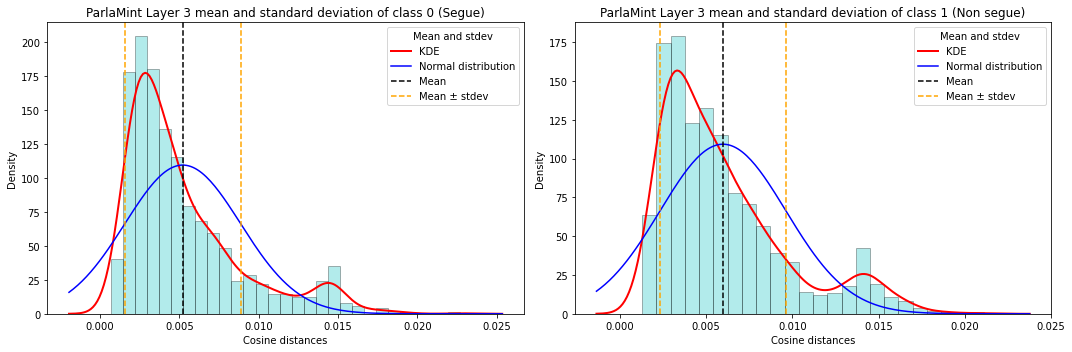

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0070
StDev: 0.0049
Mean: 0.0080
StDev: 0.0048


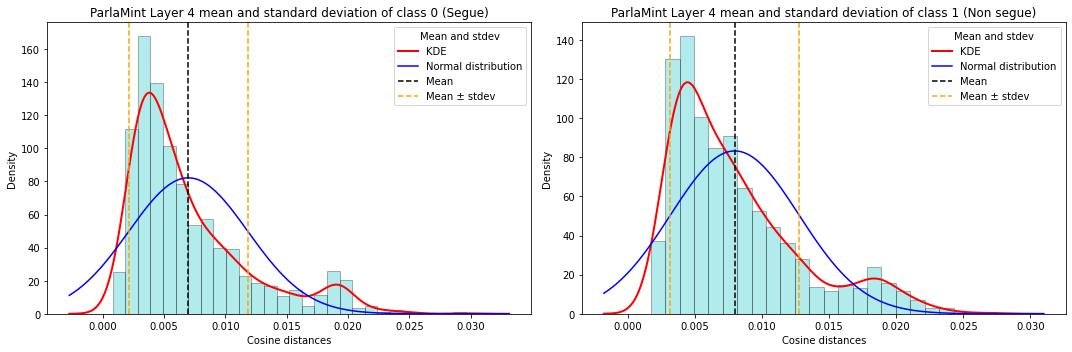

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0088
StDev: 0.0060
Mean: 0.0100
StDev: 0.0059


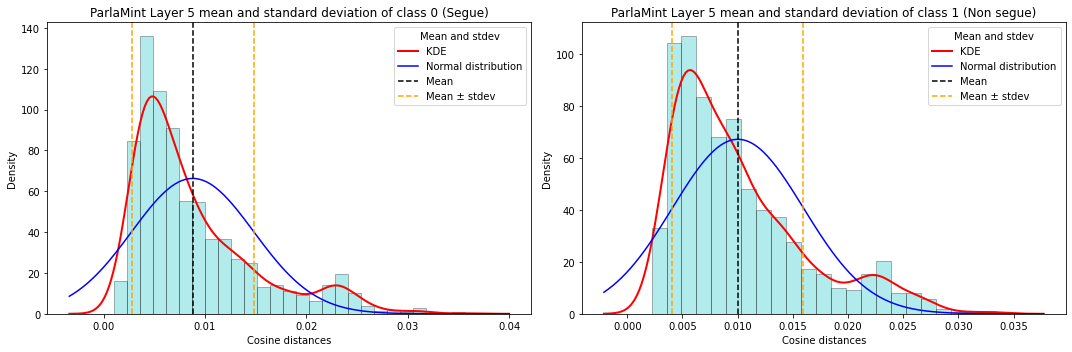

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0107
StDev: 0.0074
Mean: 0.0121
StDev: 0.0072


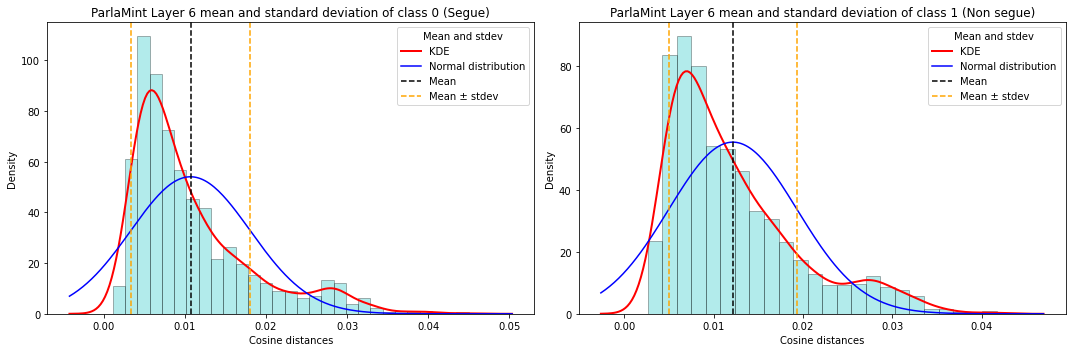

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0127
StDev: 0.0086
Mean: 0.0144
StDev: 0.0084


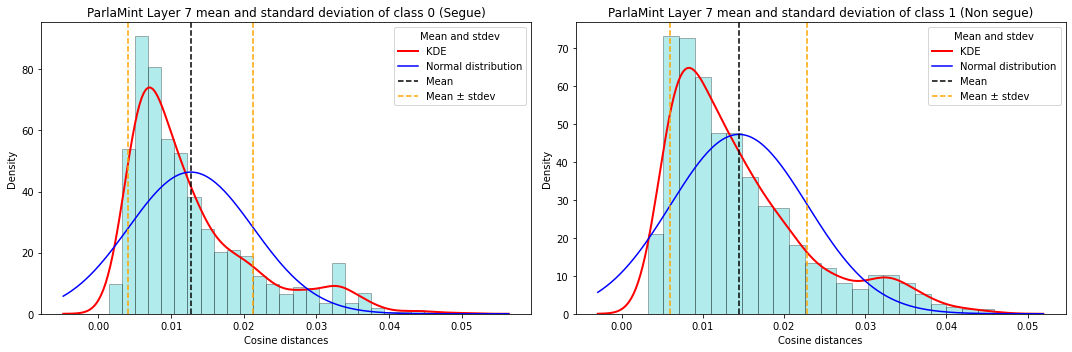

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0142
StDev: 0.0095
Mean: 0.0162
StDev: 0.0093


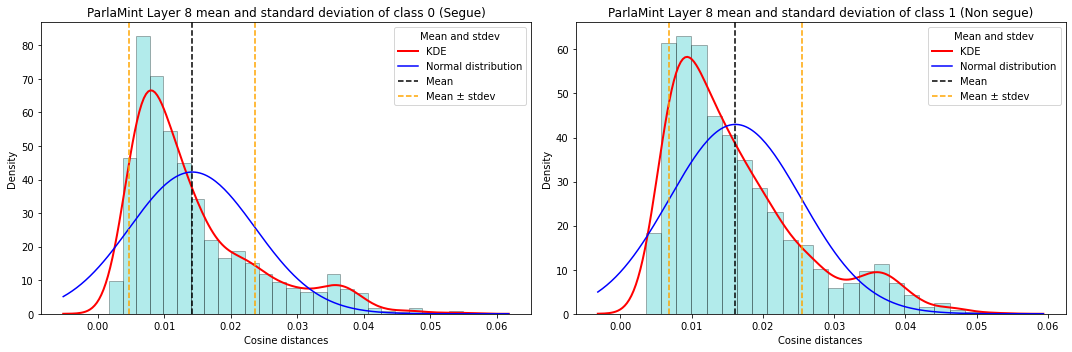

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0164
StDev: 0.0107
Mean: 0.0187
StDev: 0.0105


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0177
StDev: 0.0116
Mean: 0.0201
StDev: 0.0114


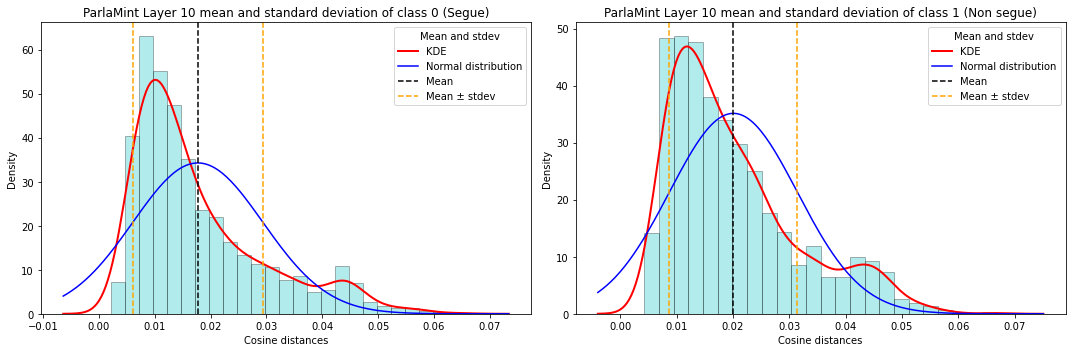

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0194
StDev: 0.0128
Mean: 0.0220
StDev: 0.0125


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0209
StDev: 0.0139
Mean: 0.0237
StDev: 0.0137


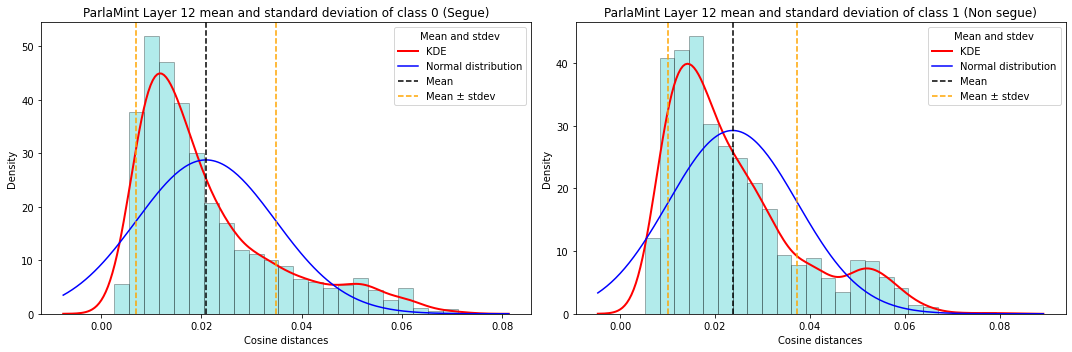

In [41]:
plot_mean_and_stdev(df_random_speech_cosine_distance_no_pretrain)

In [42]:
df_cosine_distances_dict_no_pretrain['df_dist_5']

{'Cosine_distance_layer_1': {'1': {'Mean': 0.0016,
   'Standard Deviation': 0.0011},
  '0': {'Mean': 0.0016, 'Standard Deviation': 0.0011}},
 'Cosine_distance_layer_2': {'1': {'Mean': 0.0032,
   'Standard Deviation': 0.0022},
  '0': {'Mean': 0.0031, 'Standard Deviation': 0.0022}},
 'Cosine_distance_layer_3': {'1': {'Mean': 0.0049,
   'Standard Deviation': 0.0033},
  '0': {'Mean': 0.0048, 'Standard Deviation': 0.0033}},
 'Cosine_distance_layer_4': {'1': {'Mean': 0.0065,
   'Standard Deviation': 0.0043},
  '0': {'Mean': 0.0064, 'Standard Deviation': 0.0042}},
 'Cosine_distance_layer_5': {'1': {'Mean': 0.008,
   'Standard Deviation': 0.0051},
  '0': {'Mean': 0.0078, 'Standard Deviation': 0.005}},
 'Cosine_distance_layer_6': {'1': {'Mean': 0.0095,
   'Standard Deviation': 0.0061},
  '0': {'Mean': 0.0093, 'Standard Deviation': 0.006}},
 'Cosine_distance_layer_7': {'1': {'Mean': 0.0117,
   'Standard Deviation': 0.0074},
  '0': {'Mean': 0.0114, 'Standard Deviation': 0.0072}},
 'Cosine_distanc